# *Synopsis: Capstone Project - AUTOMATIC TICKET ASSIGNMENT (NLP)*

Firstly, Thanks to our mentor and study materials which has help
ed us to understand and learn insight of basic python coding, Exploratory Data Analysis(EDA), Text data pre-processing technique, Machine learning algorithms, Neural Network and Sequential Models. 

**This Project scope covers deliverables as under,**  

1) *Understanding of data types* and exploration of attributes interms of shape, size, missing values and unique values variables. Descriptive statistics of attributes and distribution pattern. Loading of dataset, converting data types to workable datatypes. 

2) *Univariate Analysis*: Identification of unique groups, callers and input language type contribution with respect to total dataset. Identification of outliers.

3) *Bi-variate Analysis*: Bi-variate analysis between the predictor variable and between the predictor variable and target variable. Inference on relationship study. Stratergies to address data popullation, outliers and missing values.

4) *Text Pre-processing*: 
 
Text preprocessing includes, Converting characters to lower case, removal of hyperlinks,removal of Web link, removal of mail Id, expand text, removal of all the special characters and digits, removal of single characters, removal of extra spaces, Removal of stop words and tokenization of words

5) Exploration of count based machine learning models, like Multinomial Naive Base, Decision tree, Random forest and others for attributes 'Short Description' and 'Description' separately. 

6) Exploration of basic sequential models

**Dataset Understanding:**

To execute the above mentioned delivarables dataset is processed at multiple level the details of dataset with dataset name and its type of processing as under,

Dataset name&emsp;&emsp;&emsp;    Type of processing

df :&emsp;&emsp;&emsp;               _Originally provided dataset for study_

df1:&emsp;&emsp;&emsp;              _Removed outliers from dataset based on uni-variate and bi-variate analysis outcomes_  

df2:&emsp;&emsp;&emsp;              _Text preprocessing interms of removing impurity of text_

df3:&emsp;&emsp;&emsp;              _Word level, Single gram & Bi-gram analysis_

df4:&emsp;&emsp;&emsp;              _All the steps till df3 with onnly 'Description' attributes_

df5:&emsp;&emsp;&emsp;              _All the steps till df3 with onnly 'Short Description' attributes_


**Note:**

During Data Analysis it was observed that there are ticket information in non-English language like German, Spanish etc. Hence 3 new columns have been added to dataset for better data understanding, cleansing &  processing.

* **Cat_Short_Description** : Language used in Short Description column - English, German, Spanish, Other
* **Cat_Description** &emsp;&emsp;&emsp;: Language used in Description column - English, German, Spanish, Other
* **Final Category** &emsp;&emsp;&emsp;&nbsp; : This is derived from above two columns. Only if both the above columns are English the Final Category is English else it is the other Non-English language

##### Mount google drive to access required project files

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#To change the current directory
import os
os.chdir('/content/drive/My Drive/Capstone Project/Interim_Sub')

#To validate the current path 
path = os.getcwd()
print(path)

/content/drive/My Drive/Capstone Project/Interim_Sub


Populating the interactive namespace from numpy and matplotlib


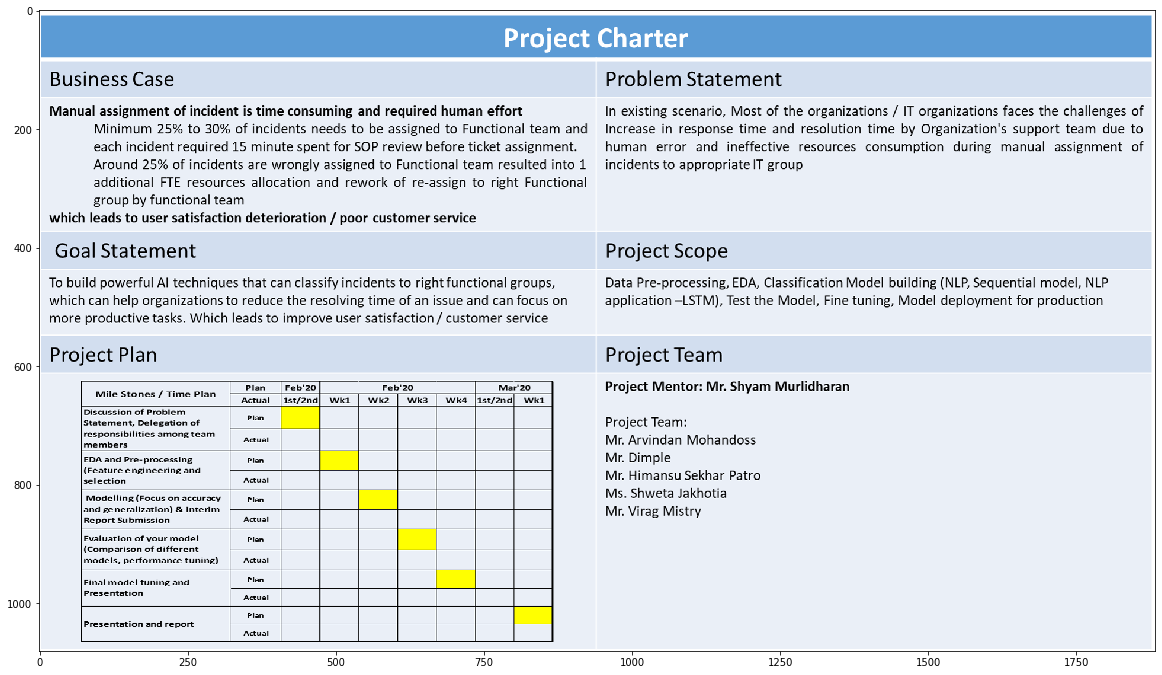

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('Business_Case.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


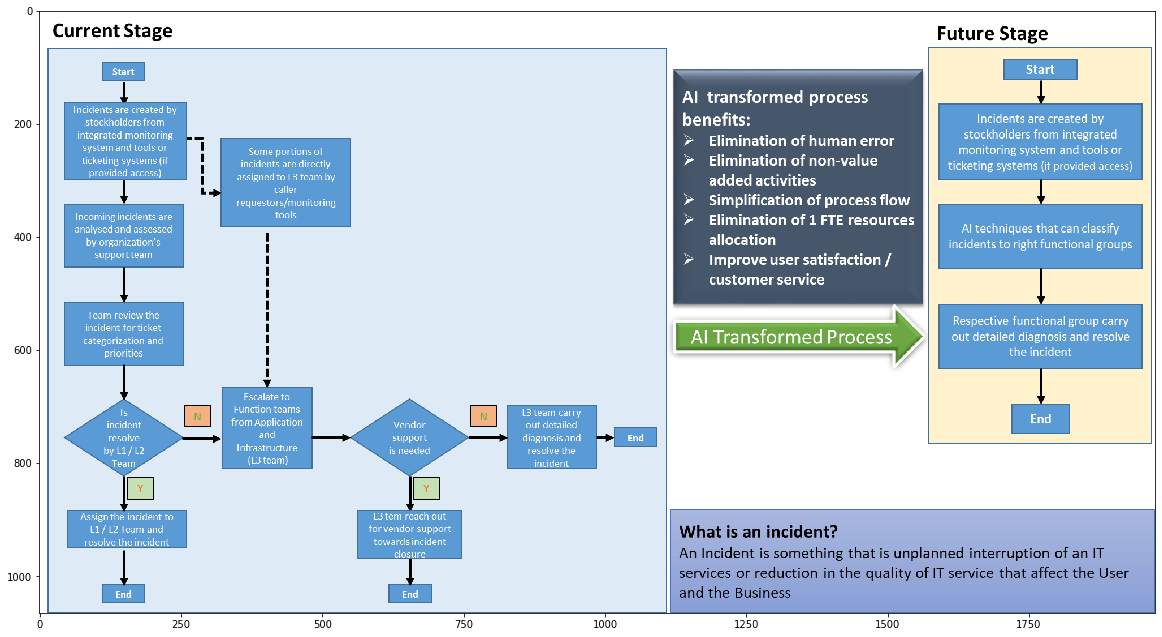

In [0]:
%pylab inline
import matplotlib.pyplot as plt
img = mpimg.imread('Process_Flow.png')
plt.figure(figsize=(20,20))
imgplot = plt.imshow(img)
plt.show()

In [0]:
!pip install contractions

     |████████████████████████████████| 245kB 3.3MB/s 
     |████████████████████████████████| 317kB 13.9MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81706 sha256=5c6aedd2f52d8eb0e11e5e8e6a6ee1863088011c971b32189ac0f6e3bf9f6855
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


### Importing Important Libraries

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import nltk
import re
import contractions
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
import matplotlib
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Extract Dataset

In [0]:
#Read the dataset
df = pd.read_excel('Input_Data_Final.xlsx') 

In [0]:
# convert dataset to CSV format
df.to_csv('Input_Data_Final.csv')

In [0]:
#Read the csv converted dataset
df = pd.read_csv('Input_Data_Final.csv',encoding='latin-1') 
#encoding as latin-1 is used since the input data has text in many non-english languages
df.drop('Unnamed: 0',inplace=True,axis=1)

### Data Exploration

In [0]:
df.head() #check the top 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [0]:
df.tail() #check the bottom 5 records

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
8495,emails not coming in from zz mail,\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail...,avglmrts vhqmtiua,GRP_29,English,English,English
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,English,English,English
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,oybwdsgx oxyhwrfz,GRP_0,English,English,English
8498,machine nÃÂ£o estÃÂ¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,GRP_62,Spanish,English,Spanish
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49,German,German,German


In [0]:
print('Dataset shape :', df.shape)
print('Dataset size  :',df.size)
print(df.info())

Dataset shape : (8500, 7)
Dataset size  : 59500
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 7 columns):
Short description        8492 non-null object
Description              8499 non-null object
Caller                   8500 non-null object
Assignment group         8500 non-null object
Cat_Short_Description    8500 non-null object
Cat_Description          8500 non-null object
Final Category           8500 non-null object
dtypes: object(7)
memory usage: 465.0+ KB
None


In [0]:
df.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,8492,8499,8500,8500,8500,8500,8500
unique,7481,7817,2950,74,5,4,4
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,38,56,810,3976,8017,7984,7982


#### Identify null Value in input dataset

*From the below graph we can infer that less than 0.1% data has null values. Short Description has comparitively more null values than Description column*

These input records will be handled during data cleansing process

In [0]:
null_value = (df.isna().sum()/df.count().round(2))*100

In [0]:
df.isna().sum()

Short description        8
Description              1
Caller                   0
Assignment group         0
Cat_Short_Description    0
Cat_Description          0
Final Category           0
dtype: int64

Text(0.5, 0, 'Table Features')

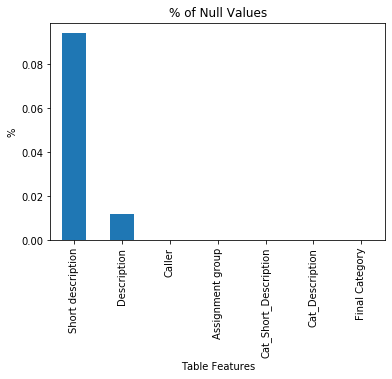

In [0]:
null_value.plot(kind='bar')
plt.title('% of Null Values')
plt.ylabel('%')
plt.xlabel('Table Features')

### <font color= 'blue'> Uni-variate Analysis</font>

**1.  Assignment Group** - Various Functional Groups handling different category of incidents

From below we have derived that there are total 74 Unique Groups
* And from the below statistics we can observe that the dataset is not normally distributed. Almost 50% of the tickets are assigned to GROUP_0. Hence we can expect better prediction for Group_0 incident tickets when compared with other groups*

In [0]:
unique_group = df['Assignment group'].unique()
print('Unique Groups count: ',len(unique_group))
print('Unique Groups for assignment\n',unique_group)

Unique Groups count:  74
Unique Groups for assignment
 ['GRP_0' 'GRP_1' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_11' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_15' 'GRP_16' 'GRP_17'
 'GRP_18' 'GRP_19' 'GRP_2' 'GRP_20' 'GRP_21' 'GRP_22' 'GRP_23' 'GRP_24'
 'GRP_25' 'GRP_26' 'GRP_27' 'GRP_28' 'GRP_29' 'GRP_30' 'GRP_31' 'GRP_33'
 'GRP_34' 'GRP_35' 'GRP_36' 'GRP_37' 'GRP_38' 'GRP_39' 'GRP_40' 'GRP_41'
 'GRP_42' 'GRP_43' 'GRP_44' 'GRP_45' 'GRP_46' 'GRP_47' 'GRP_48' 'GRP_49'
 'GRP_50' 'GRP_51' 'GRP_52' 'GRP_53' 'GRP_54' 'GRP_55' 'GRP_56' 'GRP_57'
 'GRP_58' 'GRP_59' 'GRP_60' 'GRP_61' 'GRP_32' 'GRP_62' 'GRP_63' 'GRP_64'
 'GRP_65' 'GRP_66' 'GRP_67' 'GRP_68' 'GRP_69' 'GRP_70' 'GRP_71' 'GRP_72'
 'GRP_73']


In [0]:
unique_lang_category = df['Final Category'].unique()
print('Language detected in dataset',unique_lang_category)

Language detected in dataset ['English' 'German' 'Other' 'Spanish']


In [0]:
group_freq = df.groupby(df['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
group_freq = pd.DataFrame(group_freq)

In [0]:
#Ticket count for each group
group_freq 

,Assignment group
Assignment group,
GRP_0,3976
GRP_8,661
GRP_24,289
GRP_12,257
GRP_9,252
...,...
GRP_67,1
GRP_61,1
GRP_73,1


In [0]:
#getting cumulative distribution of tickets
group_freq["cumpercentage"] = group_freq["Assignment group"].cumsum()/group_freq["Assignment group"].sum()*100

In [0]:
from matplotlib.ticker import PercentFormatter

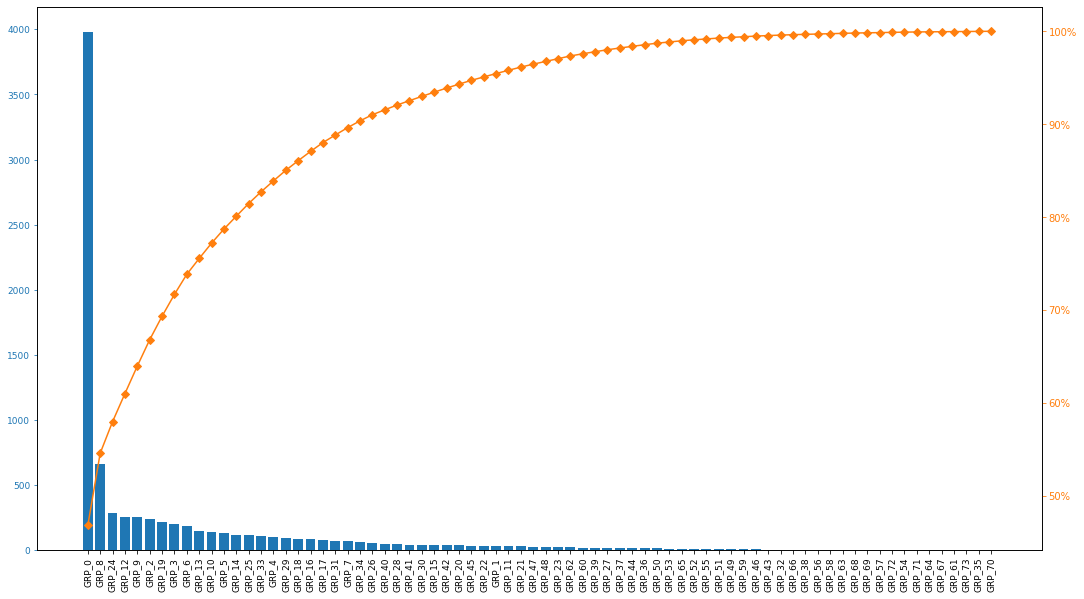

In [0]:
fig, ax = plt.subplots(figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(group_freq.index, group_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(group_freq.index, group_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

**2. Cat_Short_Description -** Language used in Short Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Short Description record has incident ticket in English Language

In [0]:
sd_cat_freq_lang = df.groupby(df['Cat_Short_Description'])['Cat_Short_Description'].count().sort_values(ascending=False)
sd_cat_freq_lang = pd.DataFrame(sd_cat_freq_lang)

sd_cat_freq_lang['percentage of rec'] = sd_cat_freq_lang/df['Cat_Short_Description'].count()
sd_cat_freq_lang

,Cat_Short_Description,percentage of rec
Cat_Short_Description,,
English,8017,0.943176
German,415,0.048824
Other,55,0.006471
Spanish,12,0.001412
Null,1,0.000118


**3. Cat_Description -** Language used in Description column - English, German, Spanish, Other

* From below analysis we can observe that almost more than 94% of Description record has incident ticket in English Language

In [0]:
d_cat_freq_lang = df.groupby(df['Cat_Description'])['Cat_Description'].count().sort_values(ascending=False)
d_cat_freq_lang = pd.DataFrame(d_cat_freq_lang)
d_cat_freq_lang['percentage of rec'] = d_cat_freq_lang/df['Cat_Description'].count()
d_cat_freq_lang

,Cat_Description,percentage of rec
Cat_Description,,
English,7984,0.939294
German,450,0.052941
Other,55,0.006471
Spanish,11,0.001294


**4. Final Category -** This is derived from above two columns. 
Only if both the above columns are English the Final Category is English else it is the other Non-English language

* From below analysis we can observe that almost more than 94% of Final Category record has incident ticket in English Language

In [0]:
unique_lang_category = df['Final Category'].unique()
print('Language detected in dataset',unique_lang_category)

Language detected in dataset ['English' 'German' 'Other' 'Spanish']


In [0]:
final_cat_freq_lang = df.groupby(df['Final Category'])['Final Category'].count().sort_values(ascending=False)
final_cat_freq_lang = pd.DataFrame(final_cat_freq_lang)
final_cat_freq_lang['percentage of rec'] = final_cat_freq_lang/df['Final Category'].count()
final_cat_freq_lang

,Final Category,percentage of rec
Final Category,,
English,7982,0.939059
German,451,0.053059
Other,55,0.006471
Spanish,12,0.001412


In [0]:
final_cat_freq_lang["cumpercentage"] = final_cat_freq_lang["Final Category"].cumsum()/final_cat_freq_lang["Final Category"].sum()*100

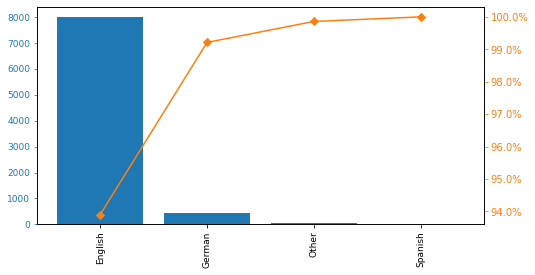

In [0]:
fig, ax = plt.subplots(figsize=(8,4))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(final_cat_freq_lang.index, final_cat_freq_lang["Final Category"], color="C0")
ax2 = ax.twinx()
ax2.plot(final_cat_freq_lang.index, final_cat_freq_lang["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

**5. Caller -** Callers/Users raising the incident tickets

*From the below statistics we can observe that Caller "bpctwhsn kzqsbmtp" has raised majority of the tickets and out of 2950 unique callers top 1500 callers have contributed to more than 80% of the tickets registration*

In [0]:
print('Total Caller rec       :',len(df['Caller']))
print('Total unique Caller rec:',len(set(df['Caller'])))

Total Caller rec       : 8500
Total unique Caller rec: 2950


In [0]:
a = df['Caller'].unique()
#a = pd.DataFrame(a)
print("Unique Callers :",len(a))

Unique Callers : 2950


In [0]:
caller_freq = df.groupby(df['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)

In [0]:
caller_freq.head(1500)

,Caller,cumpercentage
Caller,,
bpctwhsn kzqsbmtp,810,9.53
ZkBogxib QsEJzdZO,151,11.31
fumkcsji sarmtlhy,134,12.88
rbozivdq gmlhrtvp,87,13.91
rkupnshb gsmzfojw,71,14.74
...,...,...
wohzmlib fxwjhapo,1,82.89
woxrljif qymrszdk,1,82.91
wogicpdt jbdyzmhf,1,82.92


**6. Short Description -** a short description for the raised incident ticket provided the user

In [0]:
print('Total Short Description rec       :',len(df['Short description']))
print('Total unique Short Description rec:',len(set(df['Short description'])))

Total Short Description rec       : 8500
Total unique Short Description rec: 7482


**7. Description -** a detailed description for the raised incident ticket provided the user

In [0]:
print('Total Description rec       :',len(df['Description']))
print('Total unique Description rec:',len(set(df['Description'])))

Total Description rec       : 8500
Total unique Description rec: 7818


## <font color = 'blue'> Inference : EDA Part I - (Uni-Variate Analysis): </font>

1) Dataset contains total 8500 rows, attributes 'Short description' and 'Description' contains null values. Dataset contains total 7 coumns all has datatype as object.

2) There are total 74 unique groups(dependent attributes), 2950 unique callers and 4 unique languages into dataset.

3) There are less than 0.1% of null values(null input) into entire dataset. 

4) 'Assignment group' - GRP_0 contribute 46% of values into target attributes. It is indication that GRP_0 handles 46% of input tickets. Secondly, Contribution of many other Assignment group are less than 1%. 

*Imbalace of target group observed and suggested to discussed with clients and request for futher data collection on other 'Assignment group', which will help to improve the accuracy level at group level while model building. There is high probability of getting low accuracy rate with provided dataset for those groups having very limited data point to train the model.* 

5) 95% of input language identified as an English into dataset. As other languate contribution is less than 8 to 10%, other input language considered as an outlier and such data points are removed from dataset for futher study and model building. 

6) Only Caller: 'bpctwhsn kzqsbmtp' generates 10% of the total input tickets. It is indication of higher amount of multiple issues with single caller. There is not significant amount of contribution into total input tickets identified with all other callers. 


### Bi-Variate Analysis

#####  1. Assignment Group & Final Category (All Languages)

In [0]:
grp_lang = pd.crosstab(df['Assignment group'],df['Final Category'],normalize='index').round(5)*100

In [0]:
grp_lang

Final Category,English,German,Other,Spanish
Assignment group,,,,
GRP_0,97.284,2.666,0.025,0.025
GRP_1,100.000,0.000,0.000,0.000
GRP_10,97.143,2.857,0.000,0.000
GRP_11,96.667,3.333,0.000,0.000
GRP_12,89.883,9.728,0.389,0.000
...,...,...,...,...
GRP_71,100.000,0.000,0.000,0.000
GRP_72,100.000,0.000,0.000,0.000
GRP_73,100.000,0.000,0.000,0.000


##### 2. Assignment Group & Language Category  : 

From below graphs we can infer that :
* Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(German, Spanish and Others)
* GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)
* Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)
* GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset.

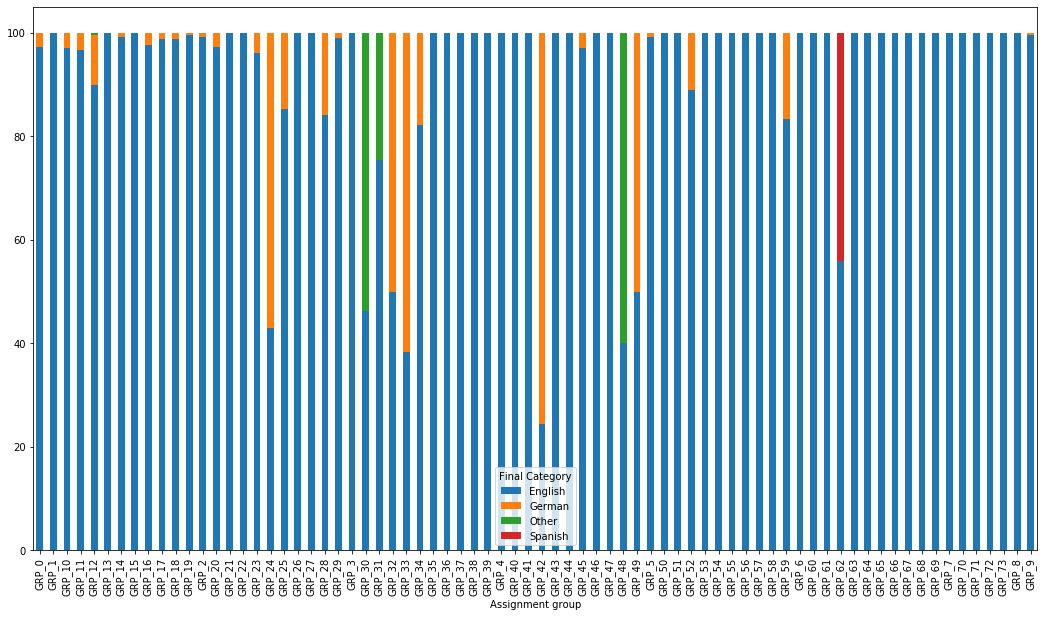

In [0]:
grp_lang.plot(kind='bar',stacked='True',figsize=(18,10))

In [0]:
group_freq["%_contri"] = group_freq["Assignment group"]/group_freq["Assignment group"].sum()*100

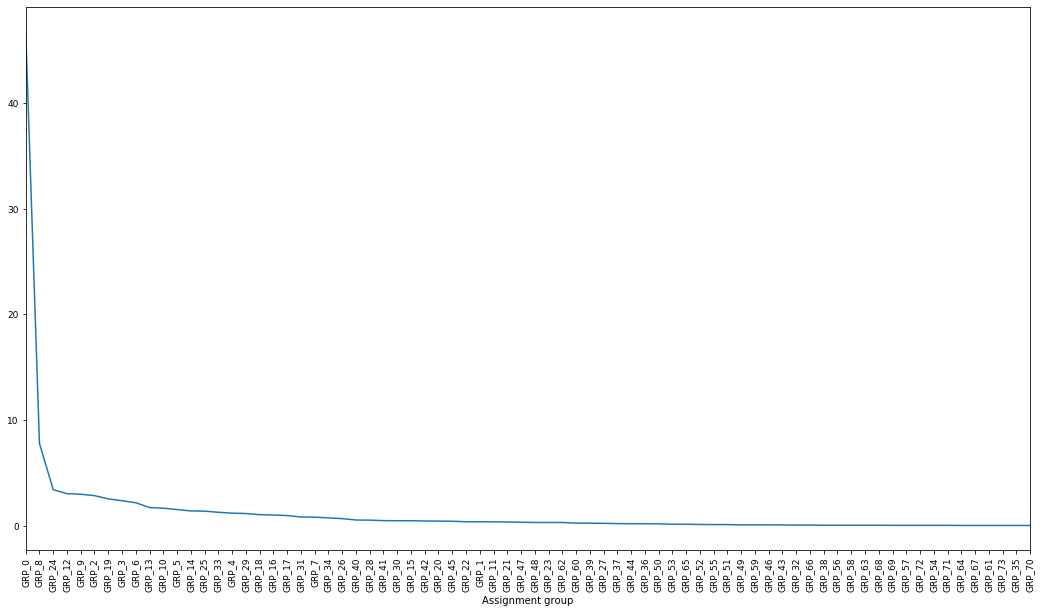

In [0]:
plt.xticks(range(0, 74))
group_freq["%_contri"].plot(kind='line',figsize=(18,10))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=9)

##### 3. Caller & Final Category (Language = German)

In [0]:
a = df[df['Final Category']== 'German']  

In [0]:
caller_freq = a.groupby(a['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
jionmpsf wnkpzcmv,16,3.55
vzqomdgt jwoqbuml,12,6.21
niptbwdq csenjruz,12,8.87
wrcktgbd wzrgyunp,8,10.64
xwirzvda okhyipgr,6,11.97
...,...,...
plfwoagd chtpiazu,1,99.11
pjrcbhln qznblemc,1,99.33
phedsjct lyphanue,1,99.56


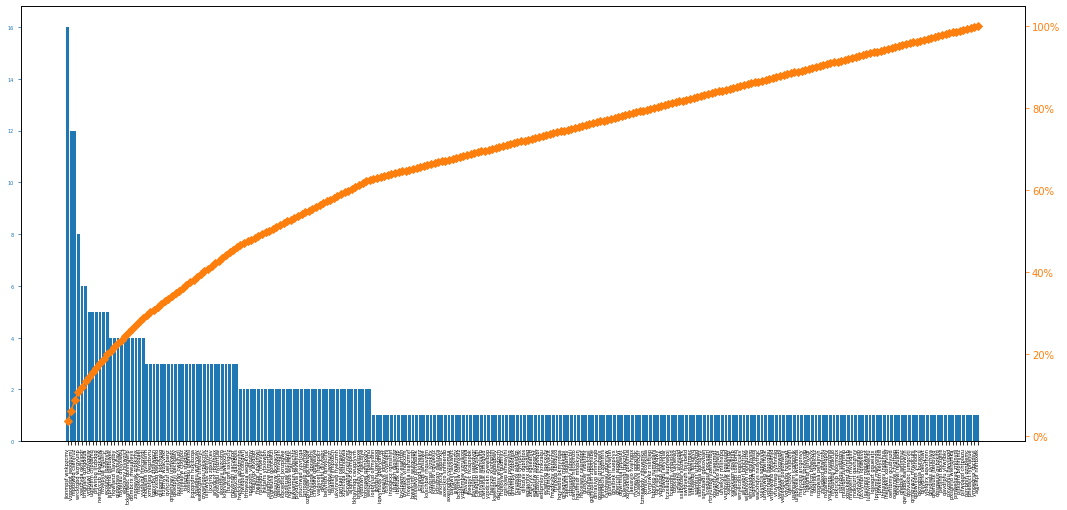

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=5)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Caller"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

*From the above graph we can infer that there is no specific caller that responds/initiate tickets in German Language*

##### 4. Assignment Group & Final Category (Language = German)

We can observe from below statistics that GRP_24 contributes almost more than 36% of tickets(in German language). However it is less than 2% of the total dataset

In [0]:
caller_freq = a.groupby(a['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_24,165,36.59
GRP_0,106,60.09
GRP_33,66,74.72
GRP_42,28,80.93
GRP_12,25,86.47
GRP_25,17,90.24
GRP_34,11,92.68
GRP_28,7,94.24
GRP_10,4,95.12


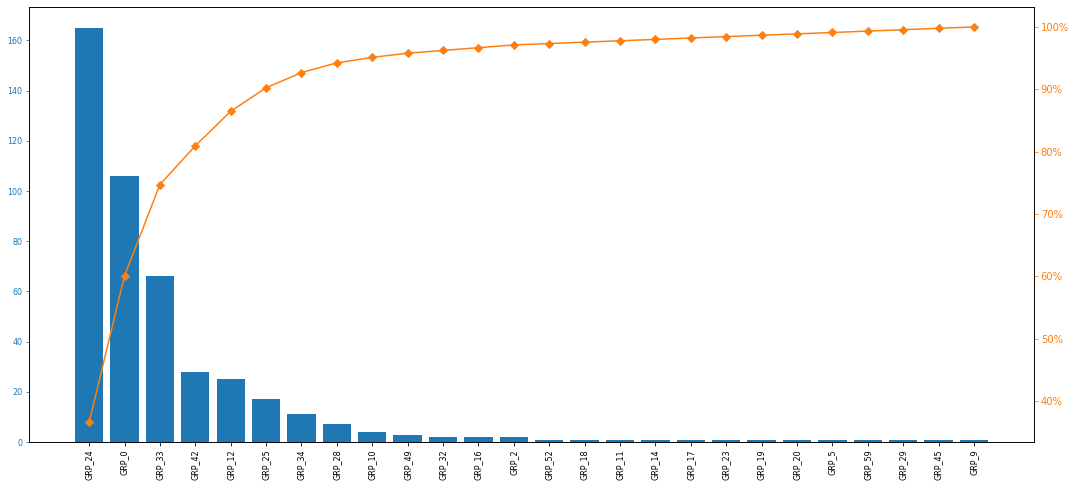

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

#### 5. Caller & Final Category (Language = Other)

*From below stats we can infer that there is no specific caller that responds/initiate tickets in Other Languages*

In [0]:
b = df[df['Final Category']== 'Other']

In [0]:
caller_freq = b.groupby(b['Caller'])['Caller'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Caller"].cumsum()/caller_freq["Caller"].sum()*100).round(2)
caller_freq

,Caller,cumpercentage
Caller,,
kyagjxdh dmtjpbnz,3,5.45
agyvbnwz mxsonkdc,3,10.91
xqyjztnm onfusvlz,2,14.55
ktghvuwr uwtakcmj,2,18.18
tmufgokq qtzavows,2,21.82
hlrmufzx qcdzierm,2,25.45
hbvwqine eakqyovu,1,27.27
kwpzbxvf cvuhoizx,1,29.09
kclhqspo xvugztyc,1,30.91


#### 6. Assignment Group & Final Category (Language = Other)
*We can obserbe from below statistics that GRP_30 contributes almost more than 39% of tickets(in Other languages). However it is less than 1% of the total dataset*

In [0]:
caller_freq = b.groupby(b['Assignment group'])['Assignment group'].count().sort_values(ascending=False)
caller_freq = pd.DataFrame(caller_freq)
caller_freq["cumpercentage"] = (caller_freq["Assignment group"].cumsum()/caller_freq["Assignment group"].sum()*100).round(2)
caller_freq

,Assignment group,cumpercentage
Assignment group,,
GRP_30,21,38.18
GRP_31,17,69.09
GRP_48,15,96.36
GRP_12,1,98.18
GRP_0,1,100.00


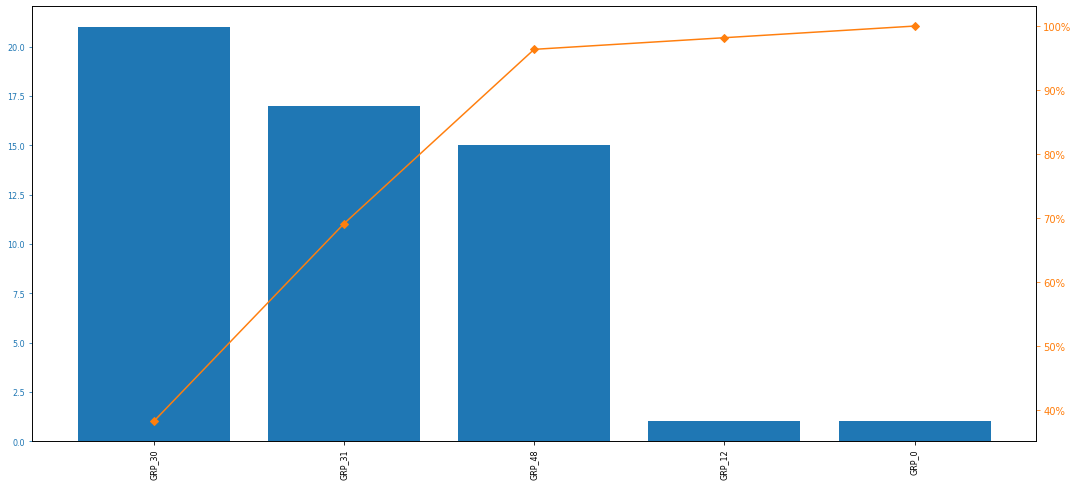

In [0]:
import matplotlib
fig, ax = plt.subplots(figsize=(18,8))
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=8)
#import matplotlib 
#matplotlib.rc('xtick', labelsize=10) 
#matplotlib.rc('ytick', labelsize=10) 
ax.bar(caller_freq.index, caller_freq["Assignment group"], color="C0")
ax2 = ax.twinx()
ax2.plot(caller_freq.index, caller_freq["cumpercentage"], color="C1", marker="D", ms=5)
ax2.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

In [0]:
df['Description'] = df['Description'].astype(str)
df['Short description'] = df['Short description'].astype(str)
df['Caller'] = df['Caller'].astype(str)

In [0]:
df1 = df.copy(deep=True)        # taking dataset backup before performing cleansing

In [0]:
df1.shape

(8500, 7)

## <font color = 'blue'> Inference : EDA Part II - (Bi-Variate Analysis): </font>

1) Input language Vs Assignment group study: Assignement groups - GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contains more than 25% of non english input text(other languages like German, Spanish and Other)

2) GRP_42 receives highest amount(greater than 40%)of non english input text (Other languages)

3) Rest other Assigment group has very few(less than 1%) or null amount of non english input text(Other languages)

4) GRP_24 contributes 3% of total dataset, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 contributes less than or equal to 1% of total dataset. 

5) Input language Vs Caller: There is no significant caller specific contribution into providing non english input text (other languages like German, Spanish, Other)

6) Input language Vs Assignment group: There is no significant Assignment group specific contribution into providing German, Spanish and Other as an input into dataset. 


Based on all the above findings, 
As contribution of all these groups GRP_24, GRP_32, GRP_33, GRP_42,GRP_48,GRP_49 and GRP_62 are not more than 6% to total dataset. Additionally, there is no significant relationship with caller and input language texts. All non-english input texts considered as outliers and removed for futher study and model building. 

7) Right skewed distribution observed for number of word count for attribute 'Description' & 'Short Description', reflected with difference between mean and median values of number of word count. It is indication of number of sentence having higher amout of number of word counts into dataset. No of word count shall be explored while building sequential model building.  

## Data Cleansing

In [0]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
print('Dataset shape_Before removal of non-englished row :',df1.shape)

Dataset shape_Before removal of non-englished row : (8500, 7)


#### Dropping records with non-English input in Short Description/Description

In [0]:
df1.drop(df1[df1['Final Category'] != 'English'].index, inplace = True)

In [0]:
print('Dataset shape_After removal of non-englished row :',df1.shape)

Dataset shape_After removal of non-englished row : (7982, 7)


In [0]:
print('Dataset shape :', df1.shape)
print('Dataset size  :',df1.size)
print(df1.info())

Dataset shape : (7982, 7)
Dataset size  : 55874
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7982 entries, 0 to 8497
Data columns (total 7 columns):
Short description        7982 non-null object
Description              7982 non-null object
Caller                   7982 non-null object
Assignment group         7982 non-null object
Cat_Short_Description    7982 non-null object
Cat_Description          7982 non-null object
Final Category           7982 non-null object
dtypes: object(7)
memory usage: 498.9+ KB
None


#### Word Counts before performing Data Cleansing

In [0]:
df1['Description_len'] = df1['Description'].astype(str).apply(len)
df1['Short_Dec_len'] = df1['Short description'].astype(str).apply(len)

df1['Des_wrd_cnt'] = df1['Description'].apply(lambda x: len(str(x).split()))
df1['Short_Des_wrd_cnt'] = df1['Short description'].apply(lambda x: len(str(x).split()))

df1.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,English,English,English,206,11,33,2
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,English,English,English,194,7,25,1
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,English,English,English,87,18,11,5
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,29,29,5,5
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,12,12,2,2


In [0]:
print(df1['Des_wrd_cnt'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Des_wrd_cnt'],90).round(2))
print('95th Percentile :',np.percentile(df1['Des_wrd_cnt'],95).round(2))

count    7982.00
mean       27.70
std        66.41
min         0.00
25%         6.00
50%        11.00
75%        29.00
max      1625.00
Name: Des_wrd_cnt, dtype: float64
90th Percentile : 58.0
95th Percentile : 97.0


In [0]:
print(df1['Short_Des_wrd_cnt'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Short_Des_wrd_cnt'],90).round(2))
print('95th Percentile :',np.percentile(df1['Short_Des_wrd_cnt'],95).round(2))

count    7982.00
mean        7.00
std         4.15
min         1.00
25%         4.00
50%         6.00
75%         9.00
max        28.00
Name: Short_Des_wrd_cnt, dtype: float64
90th Percentile : 13.0
95th Percentile : 16.0


In [0]:
print(df1['Description_len'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Description_len'],90).round(2))
print('95th Percentile :',np.percentile(df1['Description_len'],95).round(2))

count     7982.00
mean       207.73
std        532.42
min          1.00
25%         41.00
50%        106.00
75%        206.00
max      13001.00
Name: Description_len, dtype: float64
90th Percentile : 399.0
95th Percentile : 684.0


In [0]:
print(df1['Short_Dec_len'].describe().round(2))
print('90th Percentile :',np.percentile(df1['Short_Dec_len'],90).round(2))
print('95th Percentile :',np.percentile(df1['Short_Dec_len'],95).round(2))

count    7982.00
mean       47.56
std        27.72
min         1.00
25%        26.00
50%        41.00
75%        63.00
max       196.00
Name: Short_Dec_len, dtype: float64
90th Percentile : 85.0
95th Percentile : 104.0


In [0]:
df2 = df1.copy(deep = 'True') #Used for preprocessing of text

In [0]:
df2.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Short_Des_wrd_cnt'],axis=1,inplace=True)

In [0]:
df2['Description'] = df2['Description'].astype(str)
df2['Short description'] = df2['Short description'].astype(str)
df2['Caller'] = df2['Caller'].astype(str)

In [0]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7982 entries, 0 to 8497
Data columns (total 7 columns):
Short description        7982 non-null object
Description              7982 non-null object
Caller                   7982 non-null object
Assignment group         7982 non-null object
Cat_Short_Description    7982 non-null object
Cat_Description          7982 non-null object
Final Category           7982 non-null object
dtypes: object(7)
memory usage: 498.9+ KB


In [0]:
df2['Short description'][7]  #data before cleaning

"ticket_no1550391- employment status - new non-employee [enter user's name]"

In [0]:
df2['Description'][1]       # data before claensing

'\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind '

In [0]:
#Common function for text cleaning

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(text):
    sentence     = str(text)
    sentence_low = sentence.lower()                                            #Converted to lower case
    clean        = re.compile('<.*?>')                            
    rem_hyper    = re.sub(clean, '',sentence_low)                              #Remove hyperlink  
    rem_url      = re.sub(r'http:\S+', ' ',rem_hyper)                          #Remove Web link
    rem_mail     = re.sub(r"\S*@\S*.com\s?",' ',rem_url)                       #Remove mail Id
    txt_expand   = contractions.fix(rem_mail)                                  #Expand text
    rem_special  = re.sub(r"[!';:@#$%^&*()~?<>,\.:+-=`""'\'_]",' ',txt_expand) # Removed all the special characters 
    rem_num      = re.sub(r'\d', '', rem_special)                              #Remove digit
    rem_spcl     = re.sub("([^\x00-\x7F])+"," ",rem_num)                       #Remove special Char
    rem_single   = re.sub(r"\s+[a-zA-Z]\s+", ' ',rem_spcl)                     #Remove single char
    rem_spa      = re.sub(r"\s+", ' ',rem_single)                              #Remove extra spaces
    
    tokenizer    = RegexpTokenizer(r'\w+')
    text_token   = tokenizer.tokenize(rem_spa)                                #Text tokenized  
    filter_words = [w for w in text_token if len(w) > 2 if not w in stopwords.words('english')] #Remove stop words                   
    word_lemma   = [lemmatizer.lemmatize(w) for w in filter_words]            #Word Lemmatization
    clean_text   = word_lemma
    return " ".join(clean_text)  

In [0]:
df2['Short description'] = df2['Short description'].map(lambda x:preprocess(x))
df2['Description'] = df2['Description'].map(lambda x:preprocess(x))

In [0]:
df2['Short description'][7]  # data after cleansing

'ticket employment status new non employee enter user name'

In [0]:
df2['Description'][1] # data after cleansing

'received hello team meeting skype meeting etc appearing outlook calendar somebody please advise correct kind'

In [0]:
df2.head(10)

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English
5,unable log engineering tool skype,unable log engineering tool skype,eflahbxn ltdgrvkz,GRP_0,English,English,English
6,event critical hostname company com value moun...,event critical hostname company com value moun...,jyoqwxhz clhxsoqy,GRP_1,English,English,English
7,ticket employment status new non employee ente...,ticket employment status new non employee ente...,eqzibjhw ymebpoih,GRP_0,English,English,English
8,unable disable add in outlook,unable disable add in outlook,mdbegvct dbvichlg,GRP_0,English,English,English
9,ticket update inplant,ticket update inplant,fumkcsji sarmtlhy,GRP_0,English,English,English


In [0]:
df2.describe()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
count,7982,7982,7982,7982,7982,7982,7982
unique,5536,5967,2770,74,1,1,1
top,job job failed job scheduler,received job job failed job scheduler,bpctwhsn kzqsbmtp,GRP_0,English,English,English
freq,471,464,810,3868,7982,7982,7982


## Word level Analysis

### Word level, Uni-gram, Bi-gram Analysis

In [0]:
df3 = df2.copy(deep=True) # Word level Analysis

In [0]:
df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English


In [0]:
df3['Description_len'] = df3['Description'].astype(str).apply(len)
df3['Short_Dec_len'] = df3['Short description'].astype(str).apply(len)

df3['Des_wrd_cnt'] = df3['Description'].apply(lambda x: len(str(x).split()))
df3['Short_Des_wrd_cnt'] = df3['Short description'].apply(lambda x: len(str(x).split()))

df3.head()

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English,143,11,21,2
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English,108,7,15,1
2,log vpn,received cannot log vpn best,eylqgodm ybqkwiam,GRP_0,English,English,English,28,7,5,2
3,unable access tool page,unable access tool page,xbkucsvz gcpydteq,GRP_0,English,English,English,23,23,4,4
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,English,English,English,11,11,2,2


In [0]:
print("After Preprocessing Text:")
print(df3.describe().round(2))

After Preprocessing Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7982.00        7982.00      7982.00            7982.00
mean            114.90          33.14        16.39               4.91
std             265.15          18.67        37.15               2.52
min               0.00           0.00         0.00               0.00
25%              30.00          21.00         4.00               3.00
50%              50.00          28.00         7.00               5.00
75%             122.00          42.00        17.00               6.00
max            5782.00         141.00       759.00              18.00


**Inference:** After pre-processing(cleansing) text it has been identified that there are input records with only special characters which has been replaced with spaces. Hence count of such null records has increased and need to be handled

In [0]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df3['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df3['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df3['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df3['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 239.0
90th Percentile_After Preprocessing Text_Description - word count : 33.0
90th Percentile_After Preprocessing Text_Short Description - Length : 60.0
90th Percentile_After Preprocessing Text_Short Description - word count : 9.0


In [0]:
print("Before Preprocess Text:")
print(df1.describe().round(2))

Before Preprocess Text:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7982.00        7982.00      7982.00            7982.00
mean            207.73          47.56        27.70               7.00
std             532.42          27.72        66.41               4.15
min               1.00           1.00         0.00               1.00
25%              41.00          26.00         6.00               4.00
50%             106.00          41.00        11.00               6.00
75%             206.00          63.00        29.00               9.00
max           13001.00         196.00      1625.00              28.00


In [0]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df1['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df1['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df1['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df1['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 399.0
90th Percentile_After Preprocessing Text_Description - word count : 58.0
90th Percentile_After Preprocessing Text_Short Description - Length : 85.0
90th Percentile_After Preprocessing Text_Short Description - word count : 13.0


In [0]:
print('Number of Null row in Attribute - Description_Length :',df3['Description_len'][df3['Description_len']==0].count())
print('Number of Null row in Attribute - Short Description_Length :',df3['Short_Dec_len'][df3['Short_Dec_len']==0].count())
print('Number of Null row in Attribute - Description_Word_Count :',df3['Des_wrd_cnt'][df3['Des_wrd_cnt']==0].count())
print('Number of Null row in Attribute - Short_Description_Word_Count :',df3['Short_Des_wrd_cnt'][df3['Short_Des_wrd_cnt']==0].count())

Number of Null row in Attribute - Description_Length : 78
Number of Null row in Attribute - Short Description_Length : 31
Number of Null row in Attribute - Description_Word_Count : 78
Number of Null row in Attribute - Short_Description_Word_Count : 31


**Inference**: There are 78 rows in attribute 'Description' and 32 rows in attribute 'Short description' has null values after pre-processing of text. 

In [0]:
df3.drop(df3[df3['Description_len'] == 0].index, inplace = True)
df3.drop(df3[df3['Short_Dec_len'] == 0].index, inplace = True)

**Inference:** Removed the null rows from attributes 'Description' and 'Short description'

In [0]:
print("After Preprocessing with Null Values Removed:")
print(df3.describe().round(2))

After Preprocessing with Null Values Removed:
       Description_len  Short_Dec_len  Des_wrd_cnt  Short_Des_wrd_cnt
count          7890.00        7890.00      7890.00            7890.00
mean            116.11          32.95        16.57               4.89
std             266.43          18.26        37.32               2.48
min               2.00           2.00         1.00               1.00
25%              31.00          21.00         4.00               3.00
50%              51.00          28.00         7.00               5.00
75%             124.00          42.00        17.00               6.00
max            5782.00         141.00       759.00              18.00


In [0]:
print('90th Percentile_After Preprocessing Text_Description - Length :',np.percentile(df3['Description_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Description - word count :',np.percentile(df3['Des_wrd_cnt'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - Length :',np.percentile(df3['Short_Dec_len'],90).round(2))
print('90th Percentile_After Preprocessing Text_Short Description - word count :',np.percentile(df3['Short_Des_wrd_cnt'],90).round(2))

90th Percentile_After Preprocessing Text_Description - Length : 240.1
90th Percentile_After Preprocessing Text_Description - word count : 33.0
90th Percentile_After Preprocessing Text_Short Description - Length : 58.0
90th Percentile_After Preprocessing Text_Short Description - word count : 8.0


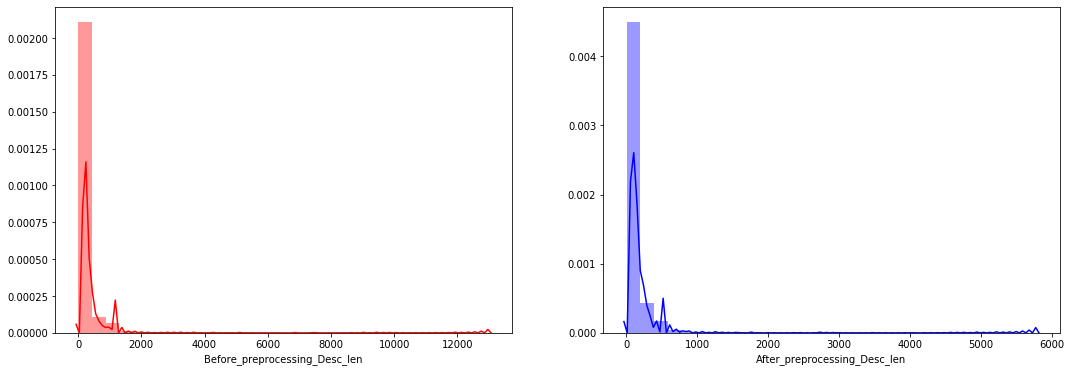

In [0]:
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,figsize=(18,6))
sns.distplot(df1['Description_len'],ax=ax1,color="red",kde=True,bins=30,axlabel="Before_preprocessing_Desc_len")
sns.distplot(df3['Description_len'],ax=ax2,color="blue",kde=True,bins=30,axlabel='After_preprocessing_Desc_len')

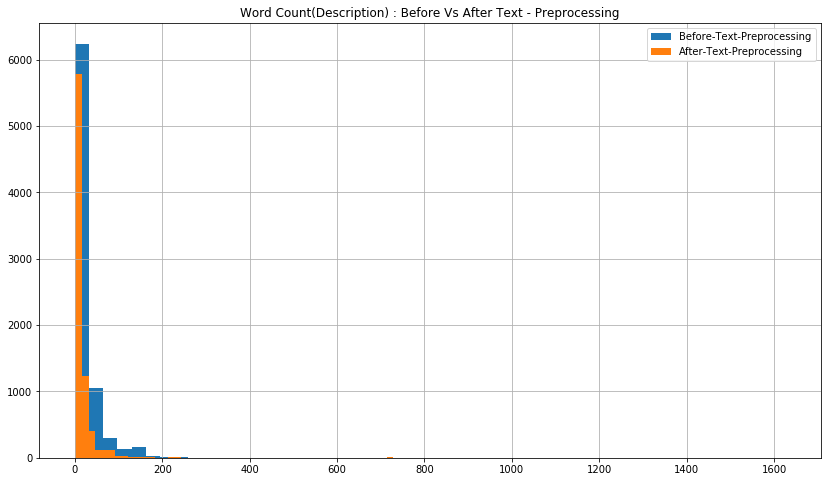

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Description) : Before Vs After Text - Preprocessing")
df1['Des_wrd_cnt'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Des_wrd_cnt'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

**Inference:** After pre-processing of text, most frequent number of words are near to 40 count across the all rows of attributes 'Description'

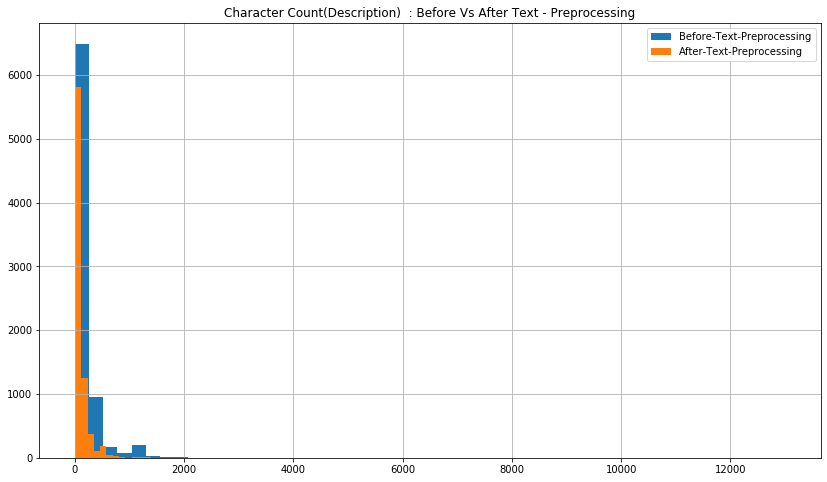

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Description)  : Before Vs After Text - Preprocessing")
df1['Description_len'].hist(bins=50,label='Before-Text-Preprocessing')
df3['Description_len'].hist(bins=50,label='After-Text-Preprocessing')
plt.legend(loc='best')

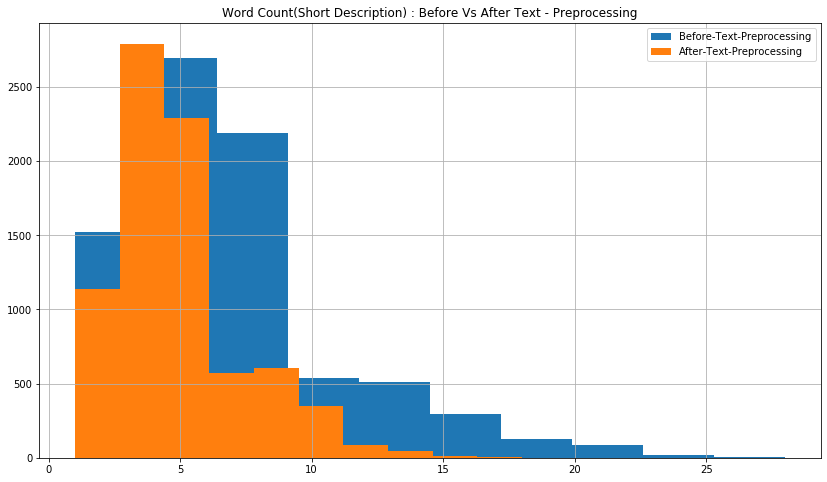

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Word Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Des_wrd_cnt'].hist(label='Before-Text-Preprocessing')
df3['Short_Des_wrd_cnt'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

**Inference:** After pre-processing of text, most frequent number of words are near to 6 count across the all rows of attributes 'Short description'

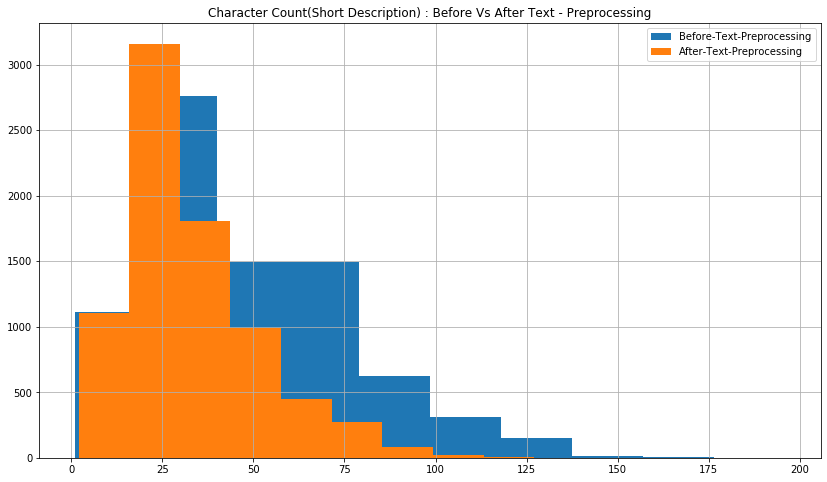

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Character Count(Short Description) : Before Vs After Text - Preprocessing")
df1['Short_Dec_len'].hist(label='Before-Text-Preprocessing')
df3['Short_Dec_len'].hist(label='After-Text-Preprocessing')
plt.legend(loc='best')

In [0]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20 = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20 = top_20.groupby('Description').sum()['count'].sort_values(ascending=True)

job 2574
received 2293
yes 2027
please 1924
password 1412
user 1399
company 1188
erp 1158
sid 1088
tool 1044
scheduler 969
issue 960
access 957
ticket 934
failed 906
reset 836
unable 783
error 777
account 752
site 707


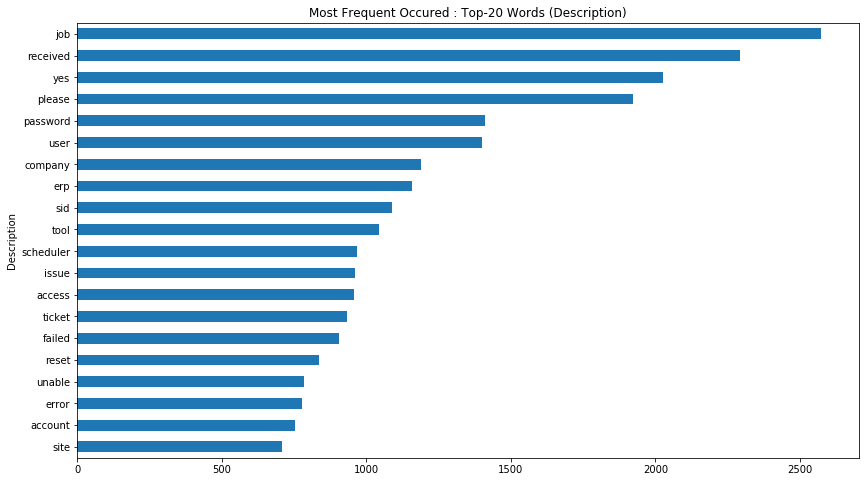

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Description)")
top_20.plot(kind='barh')

In [0]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_s = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_s = top_20_s.groupby('Short description').sum()['count'].sort_values(ascending=True)

job 2523
password 973
scheduler 959
erp 856
failed 828
unable 712
tool 677
sid 597
reset 571
issue 556
account 519
access 461
outlook 397
hostname 349
company 336
login 305
locked 297
working 291
user 289
error 284


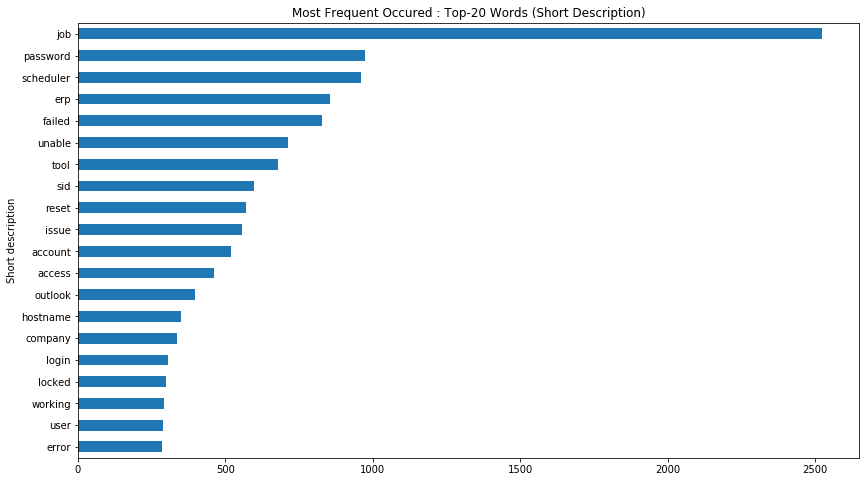

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Words (Short Description)")
top_20_s.plot(kind='barh')

In [0]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_d = pd.DataFrame(common_words, columns = ['Description' , 'count'])
top_20_b_d = top_20_b_d.groupby('Description').sum()['count'].sort_values(ascending=True)

job scheduler 969
failed job 809
received job 786
job job 631
job failed 478
cid image 444
backup circuit 427
received hello 395
password reset 354
telecom vendor 302
erp sid 296
type outage 286
scheduled maintenance 286
yes company 285
circuit yes 285
engineering tool 252
image png 249
yes yes 234
please help 218
collaboration platform 208


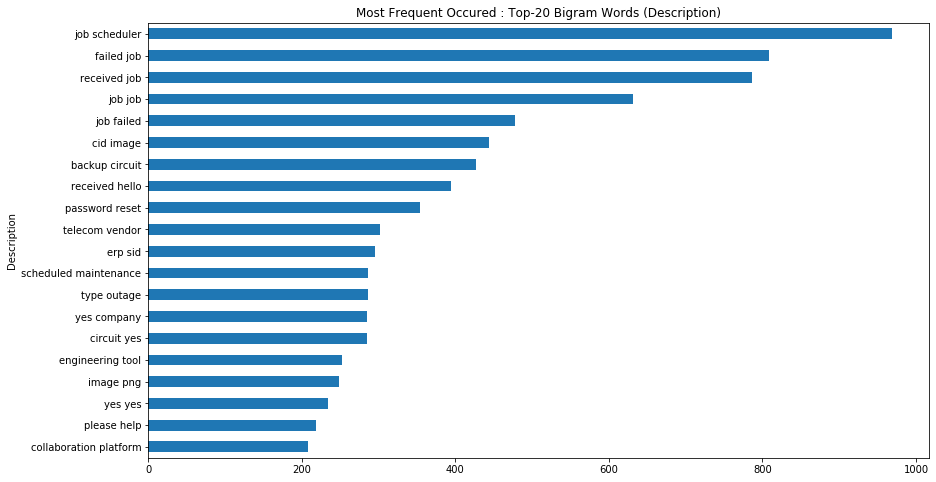

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bigram Words (Description)")
top_20_b_d.plot(kind='barh')

In [0]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df3['Short description'], 20)
for word, freq in common_words:
    print(word, freq)
top_20_b_sd = pd.DataFrame(common_words, columns = ['Short description' , 'count'])
top_20_b_sd = top_20_b_sd.groupby('Short description').sum()['count'].sort_values(ascending=True)

job scheduler 959
failed job 805
job job 632
job failed 474
password reset 371
erp sid 282
account locked 199
engineering tool 192
ticket update 152
abended job 148
reset password 142
collaboration platform 142
unable login 124
job sid 106
password management 105
management tool 105
sid account 101
tool password 92
update inplant 91
unable connect 91


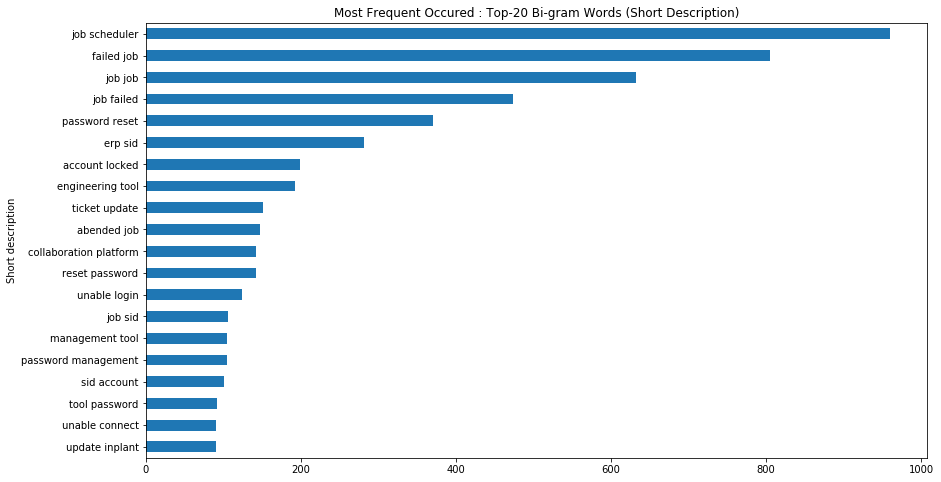

In [0]:
fig = plt.figure(figsize=(14, 8))
plt.title("Most Frequent Occured : Top-20 Bi-gram Words (Short Description)")
top_20_b_sd.plot(kind='barh')

#### Word Cloud Representation of above statistics

In [0]:
!pip install Wordcloud

In [0]:
from wordcloud import WordCloud

In [0]:
stop = stopwords.words('english')

Text(0.5, 1, 'Most Frequent Uni-gram Words - Description Attribute')

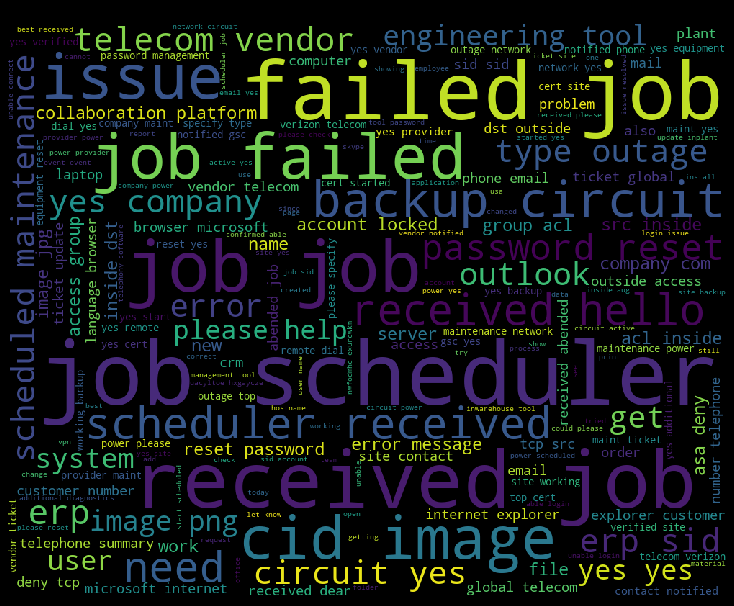

In [0]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=800,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3.Description,stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute")

Text(0.5, 1, 'Most Frequent Uni-gram Words - Short description Attribute')

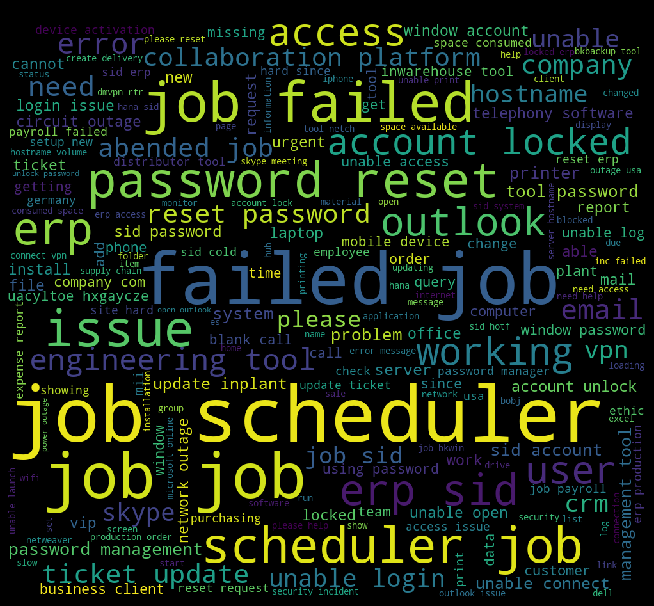

In [0]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3['Short description'],stop)
plt.title("Most Frequent Uni-gram Words - Short description Attribute")

Text(0.5, 1, 'Most Frequent Uni-gram Words - Description Attribute with Group_0')

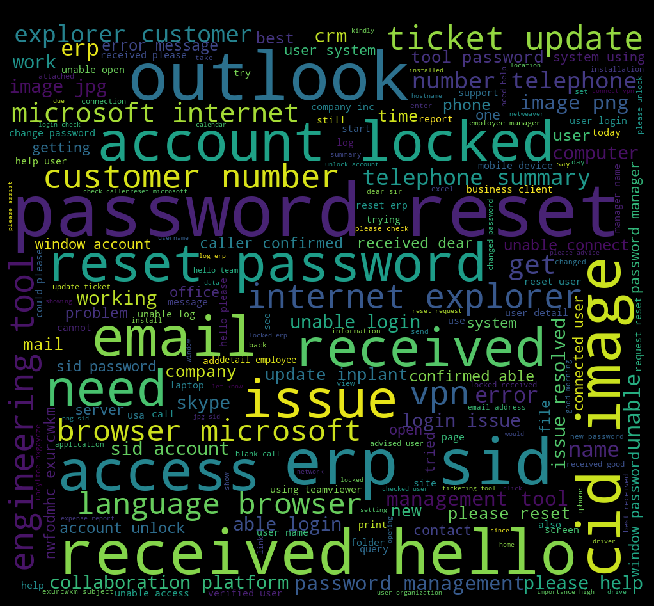

In [0]:
def wordcloud(text,stopwords,ngram=1):
    # text: if ngram>1, text should be a dictionary
    wordcloud = WordCloud(width=1000, 
                          height=900,
                          background_color='black',
                          stopwords=stop)
    if ngram ==1:
       wordc = wordcloud.generate(' '.join(text))
    else:
       wordc = wordcloud.generate_from_frequencies(text)
    plt.figure(figsize=(10,8), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
wordcloud(df3.Description[df3['Assignment group']=='GRP_0'],stop)
plt.title("Most Frequent Uni-gram Words - Description Attribute with Group_0")

**Inference:** Based on above Uni-gram and bi-gram analysis we can observe that among the Top 20 words, there are more than 75% word combination that are not common in 'Description' and 'Short description' attribute.

*Hence we can conclude that both the attributes are important for model building and prediction*

In [0]:
#Generating final data set to be used for further processing and model building
df3.to_csv('Input_Data_for_model.csv') 

### ** EDA ENDS **

##### <font color = 'blue'> Further Model Building Approach to be followed: </font>

Based on dataset and nature of the problem, as a team we have been exploring following approaches to build algorithm:

*1) Machine Learning Algorithms –* Like Multinomial Naïve Base, SVC, Decision tree, Random forest, Bagging and Boosting Techniques explored by using count vector and TF-IDF to understand application of statistical based algorithms and its accuracy level. 

All the above mentioned models are explored with Count Vector and TF-IDF and out of all **Multinomial Naïve Base** with count vector out performed in terms of accuracy. Same model explored further with respect to bi-gram and tri-gram words and observed accuracy improved by 2% when compared to Multinomial Naïve base Uni-gram model. 

2)	As Sequential model API are known for developing deep learning models in most situations- which can be utilized for multiple different input sources, produce multiple output destinations or models that re-use layers. So Encoding of attributes ‘Description’ and ‘Short description’ are done and simple level of sequential models like Neural Network(NN), LSTM, Bidirectional LSTM models are under study.  

3)	Pre-trained models like GLOVE, ELMO & BERT model will be explored and used as an Embedding layer to built higher level of Sequential model. 

4)	Attributes ‘Description’ and ‘Short description’ – both the attributes considerd as an input and concatenated to sequential model as a single input to get the output in terms of ‘Assignment group’ using pre-trained embedding layers like, GLOVE, ELMO, BERT etc.


In [0]:
df4 = df3.copy(deep=True)
df5 = df3.copy(deep=True)

In [0]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7890 entries, 0 to 8497
Data columns (total 11 columns):
Short description        7890 non-null object
Description              7890 non-null object
Caller                   7890 non-null object
Assignment group         7890 non-null object
Cat_Short_Description    7890 non-null object
Cat_Description          7890 non-null object
Final Category           7890 non-null object
Description_len          7890 non-null int64
Short_Dec_len            7890 non-null int64
Des_wrd_cnt              7890 non-null int64
Short_Des_wrd_cnt        7890 non-null int64
dtypes: int64(4), object(7)
memory usage: 739.7+ KB


In [0]:
df4.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Short description'],axis=1,inplace=True)
df5.drop(['Description_len','Short_Dec_len','Des_wrd_cnt','Caller','Short_Des_wrd_cnt','Caller','Cat_Short_Description','Cat_Description','Final Category','Description'],axis=1,inplace=True)


### Base models exploration - 
We have explored various models below  - MultinomialNB, Decision TRee, Random Forest, SVC, Bagging and Boosting.

It was observed that MultinomialNB model out performed the other model training.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()
x = cv.fit_transform(df4['Description'])
y = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))
y_pred = model.predict(x_test)

0.6916983523447402
0.6482889733840305


In [0]:
#Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.1,0.3,0.5,0.7,0.9,1],'fit_prior':[True,False]}
model2 = GridSearchCV(model, param_grid=parameters, cv=10,verbose=5)
model2.fit(x_train,y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.631, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.638, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ........... alpha=0.1, fit_prior=True, score=0.639, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.628, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.623, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


[CV] ........... alpha=0.1, fit_prior=True, score=0.640, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.620, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.647, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.631, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.621, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.562, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.557, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    7.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [0]:
print("Best Hyper Parameters:\n", model2.best_params_,model2.best_score_)

Best Hyper Parameters:
 {'alpha': 0.3, 'fit_prior': True} 0.6370391081064815


In [0]:
Best_model = MultinomialNB(alpha=0.3,fit_prior=True)
Best_model.fit(x_train,y_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import math
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
result_MNB = pd.Series(cross_val_score(Best_model,x_train, y_train, cv=kfold)*100)
result_MNB

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0    63.449367
1    63.132911
2    61.965135
3    63.074485
4    63.232964
5    66.561014
6    62.757528
7    63.391442
8    66.402536
9    63.708399
dtype: float64

In [0]:
print('95% of Confidence Interval(Model Based on Description): \n\tUppper Limit = {}\n\tLower Limit = {}'.format
      ((result_MNB.mean())-(1.96)*(result_MNB.std()/(math.sqrt(result_MNB.count()))), 
       (result_MNB.mean())+(1.96)*(result_MNB.std()/(math.sqrt(result_MNB.count())))                                                                             
      ))

95% of Confidence Interval(Model Based on Description): 
	Uppper Limit = 62.83373361941387
	Lower Limit = 64.70142255222449


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.98      0.80       785
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.67      0.07      0.13        28
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.62      0.48      0.54        44
      GRP_13       0.42      0.59      0.49        27
      GRP_14       0.78      0.28      0.41        25
      GRP_15       0.00      0.00      0.00         3
      GRP_16       0.00      0.00      0.00        13
      GRP_17       0.00      0.00      0.00         6
      GRP_18       0.43      0.19      0.26        16
      GRP_19       0.43      0.12      0.19        48
       GRP_2       0.46      0.30      0.37        43
      GRP_20       1.00      0.10      0.18        10
      GRP_21       0.00      0.00      0.00         7
      GRP_22       0.00      0.00      0.00         9
      GRP_23       0.00      0.00      0.00         8
      GRP_24       0.88    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
cv = CountVectorizer()
x1 = cv.fit_transform(df5['Short description'])
y1 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(x1_train, y1_train)
print(model1.score(x1_train,y1_train))
print(model1.score(x1_test,y1_test))
y_pred = model1.predict(x1_test)

0.694233206590621
0.6451204055766794


In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[0.1,0.3,0.5,0.7,0.9,1],'fit_prior':[True,False],}
model3 = GridSearchCV(model1, param_grid=parameters, cv=10,verbose=5)
model3.fit(x1_train,y1_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.644, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.630, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.661, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.658, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


[CV] ........... alpha=0.1, fit_prior=True, score=0.639, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.643, total=   0.1s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.602, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.658, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.620, total=   0.0s
[CV] alpha=0.1, fit_prior=True .......................................
[CV] ........... alpha=0.1, fit_prior=True, score=0.629, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .......... alpha=0.1, fit_prior=False, score=0.533, total=   0.1s
[CV] alpha=0.1, fit_prior=False ......................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    5.8s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.3, 0.5, 0.7, 0.9, 1],
                         'fit_prior': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [0]:
print("Best Hyper Parameters:\n", model3.best_params_,model3.best_score_)

Best Hyper Parameters:
 {'alpha': 0.3, 'fit_prior': True} 0.6520885574434794


In [0]:
Best_model = MultinomialNB(alpha=0.3,fit_prior=True)
Best_model.fit(x1_train,y1_train)

MultinomialNB(alpha=0.3, class_prior=None, fit_prior=True)

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import math
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
result_MNB_ = pd.Series(cross_val_score(Best_model,x1_train, y1_train, cv=kfold)*100)
result_MNB_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0    64.873418
1    66.139241
2    64.817750
3    64.183835
4    63.866878
5    65.927100
6    61.648177
7    65.134707
8    65.451664
9    67.194929
dtype: float64

In [0]:
print('95% of Confidence Interval(Model Based on Short Description): \n\tUppper Limit = {}\n\tLower Limit = {}'.format
      ((result_MNB_.mean())-(1.96)*(result_MNB_.std()/(math.sqrt(result_MNB_.count()))), 
       (result_MNB_.mean())+(1.96)*(result_MNB_.std()/(math.sqrt(result_MNB_.count())))                                                                             
      ))

95% of Confidence Interval(Model Based on Short Description): 
	Uppper Limit = 63.99123688804842
	Lower Limit = 65.85630268145148


In [0]:
from sklearn.metrics import classification_report
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

       GRP_0       0.68      0.98      0.81       785
       GRP_1       0.00      0.00      0.00         6
      GRP_10       0.67      0.14      0.24        28
      GRP_11       0.00      0.00      0.00         4
      GRP_12       0.54      0.50      0.52        44
      GRP_13       0.55      0.44      0.49        27
      GRP_14       0.82      0.36      0.50        25
      GRP_15       0.00      0.00      0.00         3
      GRP_16       0.00      0.00      0.00        13
      GRP_17       0.00      0.00      0.00         6
      GRP_18       0.25      0.06      0.10        16
      GRP_19       0.33      0.10      0.16        48
       GRP_2       0.39      0.21      0.27        43
      GRP_20       1.00      0.10      0.18        10
      GRP_21       0.00      0.00      0.00         7
      GRP_22       0.00      0.00      0.00         9
      GRP_23       0.00      0.00      0.00         8
      GRP_24       0.76    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##### MultinomialNB - explored with Single gram, Bi-Gram, Tri Gram

In [0]:
cv = CountVectorizer(ngram_range=(1,3))  #Single gram, Bi-Gram, Tri Gram
x2 = cv.fit_transform(df4['Description'])
y2 = df4['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model_B = MultinomialNB(fit_prior=True)
model_B.fit(x2_train, y2_train)
print(model_B.score(x2_train,y2_train))
print(model_B.score(x2_test,y2_test))
y_pred = model_B.predict(x2_test)

0.8094106463878327
0.6615969581749049


In [0]:
cv = CountVectorizer(ngram_range=(1,3))
x2 = cv.fit_transform(df5['Short description'])
y2 = df5['Assignment group']

In [0]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.naive_bayes import MultinomialNB
model_B = MultinomialNB(fit_prior=True)
model_B.fit(x2_train, y2_train)
print(model_B.score(x2_train,y2_train))
print(model_B.score(x2_test,y2_test))
y_pred = model_B.predict(x2_test)

0.7967363751584284
0.6660329531051965


In [0]:
#### Sequential model exploration - in progress

In [0]:
assignment_group = pd.DataFrame(df4['Assignment group'])
group = pd.get_dummies(assignment_group,columns=['Assignment group'])

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df4['Description'], group, test_size = 0.2, random_state = 0)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x_train)
sequences = tokenizer.texts_to_sequences(x_train)
tokenizer.fit_on_texts(x_test)
sequences_test = tokenizer.texts_to_sequences(x_test)

Using TensorFlow backend.


In [0]:
length = []
for x in x_train:
    length.append(len(x.split()))

In [0]:
max(length)

759

In [0]:
x_train_seq = pad_sequences(sequences, maxlen=33,padding='post')
print('Shape of data tensor:', x_train_seq.shape)
x_test_seq = pad_sequences(sequences_test, maxlen=33,padding='post')
print('Shape of data tensor:', x_train_seq.shape)

Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)


In [0]:
x_train_seq[:5]

array([[   2,    1,    9,  575,   15,    1,   11,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,   25,   27,  252,   43,   28,  260,    3,   58,   13,  290,
         794,   14,  161,  290,  794,   14,  161,    3, 1089,  527,   72,
         410, 1337,  223,   43,    0,    0,    0,    0,    0,    0,    0],
       [3059, 3060,   48,    5, 2036,  558,  513,  201,  200,   78,    5,
         207, 1466,    8,   32,   76,  219,    5,  143,   10,  129,    5,
         143,   10,  538, 1026,   94,   33,    5,  305,   52,   20,  127],
       [   2,  796, 4557, 2490, 3061, 3062, 4558, 2491, 4559, 2037,   82,
           8,   78,   25,    5,   63,   82,    8,   78,  277,  398,   70,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  48,    5,   16,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,   

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

##### Sequential - LSTM

In [0]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(20000, embedding_vecor_length, input_length=33))
model.add(LSTM(130))
model.add(Dense(74, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(x_train_seq, y_train, validation_data=(x_test_seq, y_test), epochs=6, batch_size=64)






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 130)               84760     
_________________________________________________________________
dense_1 (Dense)              (None, 74)                9694      
Total params: 734,454
Trainable params: 734,454
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 6312 samples, validate on 1578 samples
Epoch 1/6





6312/6312 [==============================] - 9s 1ms/step - loss: 2.6777 - acc: 0.4826 - val_loss: 2.4327 - val_acc: 0.4975
Epoch 2/6
6312/6312 [==============================] - 8s 1ms/step - loss: 2.4401 - a

In [0]:
# Final evaluation of the model
scores = model.evaluate(x_test_seq, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 52.41%


In [0]:
y_pred = model.predict(x_test_seq)

In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.72      0.59      0.65       785
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00        28
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        44
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        25
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00        16
          11       0.00      0.00      0.00        48
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         7
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         8
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
df3['80_20'] = df3['Assignment group'].apply(lambda row: 'Others' if (df3['Assignment group'].value_counts() <124 )[row] else row)
df3['85_15'] = df3['Assignment group'].apply(lambda row: 'Others' if (df3['Assignment group'].value_counts() < 99)[row] else row)
df3['90_10'] = df3['Assignment group'].apply(lambda row: 'Others' if (df3['Assignment group'].value_counts() < 51)[row] else row)

In [0]:
df3.head(2)

,Short description,Description,Caller,Assignment group,Cat_Short_Description,Cat_Description,Final Category,Description_len,Short_Dec_len,Des_wrd_cnt,Short_Des_wrd_cnt,80_20,85_15,90_10
0,login issue,verified user detail employee manager name che...,spxjnwir pjlcoqds,GRP_0,English,English,English,143,11,21,2,GRP_0,GRP_0,GRP_0
1,outlook,received hello team meeting skype meeting etc ...,hmjdrvpb komuaywn,GRP_0,English,English,English,108,7,15,1,GRP_0,GRP_0,GRP_0


In [0]:
print('Unique Groups count based on 80_20 principle: ',len(df3['80_20'].unique()))
print('Unique Groups for assignment based on 80_20 principle\n',df3['80_20'].unique())

Unique Groups count based on 80_20 principle:  13
Unique Groups for assignment based on 80_20 principle
 ['GRP_0' 'Others' 'GRP_3' 'GRP_5' 'GRP_6' 'GRP_8' 'GRP_9' 'GRP_10'
 'GRP_12' 'GRP_13' 'GRP_19' 'GRP_2' 'GRP_24']


In [0]:
print('Unique Groups count based on 85_15 principle: ',len(df3['85_15'].unique()))
print('Unique Groups for assignment based on 85_15 principle\n',df3['85_15'].unique())

Unique Groups count based on 85_15 principle:  16
Unique Groups for assignment based on 85_15 principle
 ['GRP_0' 'Others' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_8' 'GRP_9' 'GRP_10'
 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_19' 'GRP_2' 'GRP_24' 'GRP_25']


In [0]:
print('Unique Groups count based on 90_10 principle: ',len(df3['90_10'].unique()))
print('Unique Groups for assignment based on 90_10 principle\n',df3['90_10'].unique())

Unique Groups count based on 90_10 principle:  22
Unique Groups for assignment based on 90_10 principle
 ['GRP_0' 'Others' 'GRP_3' 'GRP_4' 'GRP_5' 'GRP_6' 'GRP_7' 'GRP_8' 'GRP_9'
 'GRP_10' 'GRP_12' 'GRP_13' 'GRP_14' 'GRP_16' 'GRP_18' 'GRP_19' 'GRP_2'
 'GRP_24' 'GRP_25' 'GRP_26' 'GRP_29' 'GRP_34']


In [0]:
import numpy as np
from keras.utils import to_categorical

## **Padding of attributes**

In [0]:
grp8020 = keras.utils.to_categorical(df3['80_20'])

NameError: ignored

### One hot Encoading for all three target attributes (80_20, 85_15, 90_10)

In [0]:
grp8020 = pd.DataFrame(df3['80_20'])
grp8020 = pd.get_dummies(grp8020,columns=['80_20']) # y1 - Target

In [0]:
grp8515 = pd.DataFrame(df3['85_15']) # y2 - Target
grp8515 = pd.get_dummies(grp8515,columns=['85_15'])

# y3 - Target
grp9010 = pd.DataFrame(df3['90_10'])
grp9010 = pd.get_dummies(grp9010,columns=['90_10'])

###  Data split up train and test.

In [0]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df3['Description'], grp8020, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(df3['Description'], grp8515, test_size = 0.2, random_state = 42)

In [0]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(df3['Description'], grp9010, test_size = 0.2, random_state = 42)

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x1_train)
sequences1 = tokenizer.texts_to_sequences(x1_train)
tokenizer.fit_on_texts(x1_test)
sequences1_test = tokenizer.texts_to_sequences(x1_test)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x2_train)
sequences2 = tokenizer.texts_to_sequences(x2_train)
tokenizer.fit_on_texts(x2_test)
sequences2_test = tokenizer.texts_to_sequences(x2_test)

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(x3_train)
sequences3 = tokenizer.texts_to_sequences(x3_train)
tokenizer.fit_on_texts(x3_test)
sequences3_test = tokenizer.texts_to_sequences(x3_test)

In [0]:
x1_train_seq = pad_sequences(sequences1, maxlen=33,padding='post')
print('Shape of data tensor:', x1_train_seq.shape)
x1_test_seq = pad_sequences(sequences1_test, maxlen=33,padding='post')
print('Shape of data tensor:', x1_train_seq.shape)

x2_train_seq = pad_sequences(sequences2, maxlen=33,padding='post')
print('Shape of data tensor:', x2_train_seq.shape)
x2_test_seq = pad_sequences(sequences2_test, maxlen=33,padding='post')
print('Shape of data tensor:', x2_train_seq.shape)

x3_train_seq = pad_sequences(sequences3, maxlen=33,padding='post')
print('Shape of data tensor:', x3_train_seq.shape)
x3_test_seq = pad_sequences(sequences3_test, maxlen=33,padding='post')
print('Shape of data tensor:', x3_train_seq.shape)

Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)
Shape of data tensor: (6312, 33)


# Model Exploration

# Approach 1: Simple Neural Network

### Simple Neural Network - 80_20 Principle

In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, BatchNormalization, Input, Concatenate, concatenate,Activation, Flatten, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, merge, TimeDistributed
from keras.optimizers import SGD

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 1
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 33
VALIDATION_SPLIT = 0.2

In [0]:
embedding_vecor_length = 10
model_SNN1 = Sequential()
model_SNN1.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=33))
model_SNN1.add(Flatten())
model_SNN1.add(Dense(units = 13, activation = 'softmax'))
print(model_SNN1.summary())
model_SNN1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 10)            200000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 330)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                4303      
Total params: 204,303
Trainable params: 204,303
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_SNN1.fit(x1_train_seq, y1_train, batch_size=32, epochs = 5, verbose = 1,validation_data=(x1_test_seq, y1_test))

Train on 6312 samples, validate on 1578 samples
Epoch 1/5
6312/6312 [==============================] - 1s 195us/step - loss: 1.8572 - acc: 0.4794 - val_loss: 1.5418 - val_acc: 0.5330
Epoch 2/5
6312/6312 [==============================] - 1s 142us/step - loss: 1.3583 - acc: 0.5762 - val_loss: 1.3958 - val_acc: 0.5570
Epoch 3/5
6312/6312 [==============================] - 1s 149us/step - loss: 1.1721 - acc: 0.6332 - val_loss: 1.3661 - val_acc: 0.5545
Epoch 4/5
6312/6312 [==============================] - 1s 153us/step - loss: 1.0424 - acc: 0.6733 - val_loss: 1.3533 - val_acc: 0.5634
Epoch 5/5
6312/6312 [==============================] - 1s 153us/step - loss: 0.9340 - acc: 0.7069 - val_loss: 1.3650 - val_acc: 0.5558


In [0]:
# Final evaluation of the model
scores_SNN1 = model_SNN1.evaluate(x1_test_seq, y1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 52.41%


In [0]:
y1_pred = model_SNN1.predict(x1_test_seq)
y1_pred = np.where(y1_pred > 0.5, 1, 0)
y1_pred
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        36
          10       0.00      0.00      0.00       126
          11       0.00      0.00      0.00        48
          12       0.38      0.09      0.15       287

   micro avg       0.72      0.38      0.50      1578
   macro avg       0.09      0.06      0.07      1578
weighted avg       0.45      0.38      0.40      1578
 samples avg       0.38      0.38      0.38      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Simple Neural Network 85_15 principle

In [0]:
embedding_vecor_length = 10
model_SNN2 = Sequential()
model_SNN2.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=33))
model_SNN2.add(Flatten())
model_SNN2.add(Dense(units = 16, activation = 'softmax'))
print(model_SNN2.summary())
model_SNN2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 33, 10)            200000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 330)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5296      
Total params: 205,296
Trainable params: 205,296
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_SNN2.fit(x2_train_seq, y2_train, batch_size=32, epochs = 5, verbose = 1,validation_data=(x2_test_seq, y2_test))

Train on 6312 samples, validate on 1578 samples
Epoch 1/5
6312/6312 [==============================] - 1s 224us/step - loss: 1.9693 - acc: 0.4678 - val_loss: 1.6597 - val_acc: 0.5342
Epoch 2/5
6312/6312 [==============================] - 1s 155us/step - loss: 1.4727 - acc: 0.5626 - val_loss: 1.5237 - val_acc: 0.5621
Epoch 3/5
6312/6312 [==============================] - 1s 150us/step - loss: 1.3044 - acc: 0.5970 - val_loss: 1.4940 - val_acc: 0.5634
Epoch 4/5
6312/6312 [==============================] - 1s 151us/step - loss: 1.1784 - acc: 0.6450 - val_loss: 1.4856 - val_acc: 0.5551
Epoch 5/5
6312/6312 [==============================] - 1s 151us/step - loss: 1.0685 - acc: 0.6782 - val_loss: 1.5024 - val_acc: 0.5431


In [0]:
# Final evaluation of the model
scores_SNN2 = model_SNN2.evaluate(x2_test_seq, y2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 52.41%


In [0]:
y2_pred = model_SNN2.predict(x2_test_seq)
y2_pred = np.where(y2_pred > 0.5, 1, 0)
y2_pred
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00       126
          14       0.00      0.00      0.00        48
          15       0.36      0.02      0.03       225

   micro avg       0.78      0.35      0.48      1578
   macro avg       0.07   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Simple Neural Network - 90_10 Principle

In [0]:
embedding_vecor_length = 10
model_SNN3 = Sequential()
model_SNN3.add(Embedding(MAX_NB_WORDS, embedding_vecor_length, input_length=33))
model_SNN3.add(Flatten())
model_SNN3.add(Dense(units = 22, activation = 'softmax'))
print(model_SNN3.summary())
model_SNN3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 33, 10)            200000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 330)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 22)                7282      
Total params: 207,282
Trainable params: 207,282
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
model_SNN3.fit(x3_train_seq, y3_train, batch_size=32, epochs = 5, verbose = 1,validation_data=(x3_test_seq, y3_test))

Train on 6312 samples, validate on 1578 samples
Epoch 1/5
6312/6312 [==============================] - 1s 235us/step - loss: 2.1952 - acc: 0.4941 - val_loss: 1.8532 - val_acc: 0.5051
Epoch 2/5
6312/6312 [==============================] - 1s 143us/step - loss: 1.6810 - acc: 0.5548 - val_loss: 1.7072 - val_acc: 0.5665
Epoch 3/5
6312/6312 [==============================] - 1s 149us/step - loss: 1.5047 - acc: 0.5759 - val_loss: 1.6794 - val_acc: 0.5691
Epoch 4/5
6312/6312 [==============================] - 1s 139us/step - loss: 1.3824 - acc: 0.6076 - val_loss: 1.6731 - val_acc: 0.5646
Epoch 5/5
6312/6312 [==============================] - 1s 138us/step - loss: 1.2741 - acc: 0.6423 - val_loss: 1.6865 - val_acc: 0.5539


In [0]:
# Final evaluation of the model
scores_SNN3 = model_SNN3.evaluate(x3_test_seq, y3_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 52.41%


In [0]:
y3_pred = model_SNN3.predict(x2_test_seq)
y3_pred = np.where(y3_pred > 0.5, 1, 0)
y3_pred
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        31
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approach 2 : Sequential LSTM

### Sequential LSTM : Based on 80_20 principle

In [0]:
embedding_vecor_length = 32
model_LSTM1 = Sequential()
model_LSTM1.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_LSTM1.add(LSTM(130))
model_LSTM1.add(Dense(13, activation='softmax'))
model_LSTM1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM1.summary())
model_LSTM1.fit(x1_train_seq, y1_train, validation_data=(x1_test_seq, y1_test), epochs=6, batch_size=64)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 130)               84760     
_________________________________________________________________
dense_5 (Dense)              (None, 13)                1703      
Total params: 726,463
Trainable params: 726,463
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 9s 1ms/step - loss: 1.7416 - acc: 0.4914 - val_loss: 1.6011 - val_acc: 0.5330
Epoch 2/6
6312/6312 [==============================] - 8s 1ms/step - loss: 1.2747 - acc: 0.6031 - val_loss: 1.6579 - val_acc: 0.5349
Epoch 3/6
6312/6312 [==============================] - 8s 1

In [0]:
# Final evaluation of the model
scores = model_LSTM1.evaluate(x1_test_seq, y1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 45.69%


In [0]:
y1_pred = model_LSTM1.predict(x1_test_seq)
y1_pred = np.where(y1_pred > 0.5, 1, 0)
y1_pred
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        39
           5       0.00      0.00      0.00        53
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        36
          10       0.96      0.21      0.35       126
          11       0.00      0.00      0.00        48
          12       0.24      0.37      0.29       287

   micro avg       0.52      0.37      0.43      1578
   macro avg       0.15      0.09      0.10      1578
weighted avg       0.47      0.37      0.40      1578
 samples avg       0.37      0.37      0.37      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sequential LSTM : Based on 85_15 principle

In [0]:
embedding_vecor_length = 32
model_LSTM2 = Sequential()
model_LSTM2.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_LSTM2.add(LSTM(130))
model_LSTM2.add(Dense(16, activation='softmax'))
model_LSTM2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM2.summary())
model_LSTM2.fit(x2_train_seq, y2_train, validation_data=(x2_test_seq, y2_test), epochs=6, batch_size=64)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
lstm_3 (LSTM)                (None, 130)               84760     
_________________________________________________________________
dense_6 (Dense)              (None, 16)                2096      
Total params: 726,856
Trainable params: 726,856
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 9s 1ms/step - loss: 1.9439 - acc: 0.4823 - val_loss: 1.8067 - val_acc: 0.5608
Epoch 2/6
6312/6312 [==============================] - 8s 1ms/step - loss: 1.4356 - acc: 0.5802 - val_loss: 1.6833 - val_acc: 0.4975
Epoch 3/6
6312/6312 [==============================] - 8s 1

In [0]:
# Final evaluation of the model
scores = model_LSTM2.evaluate(x2_test_seq, y2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 47.28%


In [0]:
y2_pred = model_LSTM2.predict(x2_test_seq)
y2_pred = np.where(y2_pred > 0.5, 1, 0)
y2_pred
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.66      0.70      0.68       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        39
           6       0.00      0.00      0.00        53
           7       0.00      0.00      0.00        27
           8       0.00      0.00      0.00        20
           9       0.00      0.00      0.00        41
          10       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00        36
          13       0.00      0.00      0.00       126
          14       0.00      0.00      0.00        48
          15       0.17      0.12      0.14       225

   micro avg       0.58      0.37      0.45      1578
   macro avg       0.05   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Sequential LSTM : Based on 90_10 principle 

In [0]:
embedding_vecor_length = 32
model_LSTM3 = Sequential()
model_LSTM3.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_LSTM3.add(LSTM(130))
model_LSTM3.add(Dense(22, activation='softmax'))
model_LSTM3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTM3.summary())
model_LSTM3.fit(x3_train_seq, y3_train, validation_data=(x3_test_seq, y3_test), epochs=6, batch_size=64)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
lstm_4 (LSTM)                (None, 130)               84760     
_________________________________________________________________
dense_7 (Dense)              (None, 22)                2882      
Total params: 727,642
Trainable params: 727,642
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 9s 1ms/step - loss: 2.1400 - acc: 0.4815 - val_loss: 1.9628 - val_acc: 0.5032
Epoch 2/6
6312/6312 [==============================] - 8s 1ms/step - loss: 1.7322 - acc: 0.5234 - val_loss: 1.9735 - val_acc: 0.5253
Epoch 3/6
6312/6312 [==============================] - 8s 1

In [0]:
# Final evaluation of the model
scores = model_LSTM3.evaluate(x3_test_seq, y3_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 42.33%


In [0]:
y3_pred = model_LSTM3.predict(x3_test_seq)
y3_pred = np.where(y3_pred > 0.5, 1, 0)
y3_pred
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.69      0.57      0.62       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        39
           8       0.00      0.00      0.00        53
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        31
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approach 3 : Bidirectional LSTM

### Bidirectional LSTM : Based on 80_20 principle

In [0]:
embedding_vecor_length = 32
model_BLSTM1 = Sequential()
model_BLSTM1.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_BLSTM1.add(Bidirectional(LSTM(130)))
model_BLSTM1.add(Dense(13, activation='softmax'))
model_BLSTM1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_BLSTM1.summary())
model_BLSTM1.fit(x1_train_seq, y1_train, validation_data=(x1_test_seq, y1_test), epochs=6, batch_size=64)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_8 (Dense)              (None, 13)                3393      
Total params: 812,913
Trainable params: 812,913
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 17s 3ms/step - loss: 1.7161 - acc: 0.4997 - val_loss: 1.4748 - val_acc: 0.5513
Epoch 2/6
6312/6312 [==============================] - 14s 2ms/step - loss: 1.1944 - acc: 0.6252 - val_loss: 1.4825 - val_acc: 0.5558
Epoch 3/6
6312/6312 [==============================] - 14

In [0]:
# Final evaluation of the model
scores = model_BLSTM1.evaluate(x1_test_seq, y1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 45.82%


In [0]:
y1_pred = model_BLSTM1.predict(x1_test_seq)
y1_pred = np.where(y1_pred > 0.5, 1, 0)
y1_pred
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.70      0.58      0.63       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        39
           5       0.07      0.02      0.03        53
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        36
          10       0.85      0.23      0.36       126
          11       0.00      0.00      0.00        48
          12       0.30      0.38      0.34       287

   micro avg       0.56      0.38      0.45      1578
   macro avg       0.15      0.09      0.10      1578
weighted avg       0.48      0.38      0.41      1578
 samples avg       0.38      0.38      0.38      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Bidirectional LSTM : Based on 85_15 principle

In [0]:
embedding_vecor_length = 32
model_BLSTM2 = Sequential()
model_BLSTM2.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_BLSTM2.add(Bidirectional(LSTM(130)))
model_BLSTM2.add(Dense(16, activation='softmax'))
model_BLSTM2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_BLSTM2.summary())
model_BLSTM2.fit(x2_train_seq, y2_train, validation_data=(x2_test_seq, y2_test), epochs=6, batch_size=64)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 33, 32)            640000    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                4176      
Total params: 813,696
Trainable params: 813,696
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 17s 3ms/step - loss: 1.8603 - acc: 0.4938 - val_loss: 1.7290 - val_acc: 0.5387
Epoch 2/6
6312/6312 [==============================] - 14s 2ms/step - loss: 1.3578 - acc: 0.5914 - val_loss: 1.6771 - val_acc: 0.5006
Epoch 3/6
6312/6312 [==============================] - 14

In [0]:
# Final evaluation of the model
scores = model_BLSTM2.evaluate(x2_test_seq, y2_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 41.44%


### Bidirectional LSTM : Based on 90_10 principle

In [0]:
embedding_vecor_length = 32
model_BLSTM3 = Sequential()
model_BLSTM3.add(Embedding(20000, embedding_vecor_length, input_length=33))
model_BLSTM3.add(Bidirectional(LSTM(130)))
model_BLSTM3.add(Dense(22, activation='softmax'))
model_BLSTM3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_BLSTM3.summary())
model_BLSTM3.fit(x3_train_seq, y3_train, validation_data=(x3_test_seq, y3_test), epochs=6, batch_size=64)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 33, 32)            640000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 260)               169520    
_________________________________________________________________
dense_10 (Dense)             (None, 22)                5742      
Total params: 815,262
Trainable params: 815,262
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 18s 3ms/step - loss: 2.1180 - acc: 0.4870 - val_loss: 1.9120 - val_acc: 0.5349
Epoch 2/6
6312/6312 [==============================] - 14s 2ms/step - loss: 1.6113 - acc: 0.5619 - val_loss: 1.8626 - val_acc: 0.5196
Epoch 3/6
6312/6312 [==============================] - 1

In [0]:
scores = model_BLSTM3.evaluate(x3_test_seq, y3_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 45.25%


In [0]:
y3_pred = model_BLSTM3.predict(x3_test_seq)
y3_pred = np.where(y3_pred > 0.5, 1, 0)
y3_pred
print(classification_report(y3_test,y3_pred))

              precision    recall  f1-score   support

           0       0.69      0.62      0.66       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        24
           5       0.00      0.00      0.00        15
           6       0.00      0.00      0.00        16
           7       0.00      0.00      0.00        39
           8       0.10      0.06      0.07        53
           9       0.00      0.00      0.00        27
          10       0.00      0.00      0.00        20
          11       0.00      0.00      0.00        15
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00        41
          14       0.00      0.00      0.00        13
          15       0.00      0.00      0.00        18
          16       0.00      0.00      0.00        31
          17       0.00    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approach 4 : Model Building using pre-trained model : Glove

In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Capstone Project/glove.6B.zip', 'r') as z:
  z.extractall()

In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
#vocab_size = len(tokenizer.word_counts)
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((10695, 100))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [0]:
embedding_vecor_length = 10
model_SNNG = Sequential()
model_SNNG.add(Embedding(10695, 100, weights=[embedding_matrix], input_length=33))
model_SNNG.add(Flatten())
model_SNNG.add(Dense(units = 13, activation = 'softmax'))
print(model_SNNG.summary())
model_SNNG.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model_SNNG.fit(x1_train_seq, y1_train, batch_size=32, epochs = 5, verbose = 1,validation_data=(x1_test_seq, y1_test))

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 33, 100)           1069500   
_________________________________________________________________
flatten_4 (Flatten)          (None, 3300)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 13)                42913     
Total params: 1,112,413
Trainable params: 1,112,413
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/5
6312/6312 [==============================] - 7s 1ms/step - loss: 1.4498 - acc: 0.5532 - val_loss: 1.3523 - val_acc: 0.5830
Epoch 2/5
6312/6312 [==============================] - 3s 546us/step - loss: 0.9547 - acc: 0.6828 - val_loss: 1.3794 - val_acc: 0.5596
Epoch 3/5
6312/6312 [==============================]

In [0]:
# Final evaluation of the model
scores = model_SNNG.evaluate(x1_test_seq, y1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 54.25%


In [0]:
y1_pred = model_SNNG.predict(x1_test_seq)
y1_pred = np.where(y1_pred > 0.5, 1, 0)
y1_pred
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        39
           5       0.33      0.04      0.07        53
           6       0.00      0.00      0.00        27
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        36
          10       0.78      0.06      0.10       126
          11       0.00      0.00      0.00        48
          12       0.29      0.27      0.28       287

   micro avg       0.62      0.41      0.49      1578
   macro avg       0.17      0.08      0.09      1578
weighted avg       0.50      0.41      0.43      1578
 samples avg       0.41      0.41      0.41      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
embedding_vecor_length = 32
model_LSTMG1 = Sequential()
model_LSTMG1.add(Embedding(10695, 100, weights=[embedding_matrix], input_length=33))
model_LSTMG1.add(LSTM(260))
model_LSTMG1.add(Dense(13, activation='softmax'))
model_LSTMG1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model_LSTMG1.summary())
model_LSTMG1.fit(x1_train_seq, y1_train, validation_data=(x1_test_seq, y1_test), epochs=6, batch_size=64)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 33, 100)           1069500   
_________________________________________________________________
lstm_8 (LSTM)                (None, 260)               375440    
_________________________________________________________________
dense_12 (Dense)             (None, 13)                3393      
Total params: 1,448,333
Trainable params: 1,448,333
Non-trainable params: 0
_________________________________________________________________
None
Train on 6312 samples, validate on 1578 samples
Epoch 1/6
6312/6312 [==============================] - 33s 5ms/step - loss: 1.6361 - acc: 0.5258 - val_loss: 1.4826 - val_acc: 0.5431
Epoch 2/6
6312/6312 [==============================] - 30s 5ms/step - loss: 1.3533 - acc: 0.5835 - val_loss: 1.3987 - val_acc: 0.5634
Epoch 3/6
6312/6312 [==============================]

In [0]:
# Final evaluation of the model
scores = model_LSTMG1.evaluate(x1_test_seq, y1_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 48.42%


In [0]:
y1_pred = model_LSTMG1.predict(x1_test_seq)
y1_pred = np.where(y1_pred > 0.5, 1, 0)
y1_pred
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.74      0.46      0.57       796
           1       0.00      0.00      0.00        19
           2       0.00      0.00      0.00        47
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00        39
           5       0.62      0.09      0.16        53
           6       0.05      0.11      0.07        27
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        31
           9       0.00      0.00      0.00        36
          10       1.00      0.10      0.19       126
          11       0.00      0.00      0.00        48
          12       0.32      0.25      0.28       287

   micro avg       0.57      0.29      0.39      1578
   macro avg       0.21      0.08      0.10      1578
weighted avg       0.53      0.29      0.36      1578
 samples avg       0.29      0.29      0.29      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Approach 5 : Glove embedding with 'Description' and 'Short description' as input

In [0]:
MAX_NB_WORDS = 20000

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)

In [0]:
tokenizer.fit_on_texts(df3['Short description']+df3['Description'])

In [0]:
print(len(tokenizer.word_counts))
print(tokenizer.document_count)

15141
7890


In [0]:
from nltk import sent_tokenize

In [0]:
texts = []
texts = list(df3['Description'])

In [0]:
texts[0]

'verified user detail employee manager name checked user name reset password advised user login check caller confirmed able login issue resolved'

In [0]:
articles = []

In [0]:
for sent in texts:
  art_s = sent_tokenize(sent)
  articles.append(art_s)

In [0]:
articles[0]

['verified user detail employee manager name checked user name reset password advised user login check caller confirmed able login issue resolved']

In [0]:
from keras.preprocessing.text import text_to_word_sequence

In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 1
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 33
MAX_SENT_LENGTH1 = 13
VALIDATION_SPLIT = 0.2

In [0]:
data = np.zeros((len(articles),MAX_SENTS,MAX_SENT_LENGTH),dtype='int32')

In [0]:
data.shape

(7890, 1, 33)

In [0]:
exc = []
for i, sentences in enumerate(articles):
  for j, sent in enumerate(sentences):
    if j < MAX_SENTS:
      wordTokens = text_to_word_sequence(sent)
      k = 0
      for _, word in enumerate(wordTokens):
        try:
          if k < MAX_SENT_LENGTH and tokenizer.word_index[word] < MAX_NB_WORDS:
            data[i, j, k] = tokenizer.word_index[word]
            k = k + 1
        except:
          exc.append(word)
          pass

In [0]:
data[1,:,:]

array([[ 246,   37,   59,  259,   69,  259,  345,  883,   29,  512, 4326,
           4,  276,  301,  412,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [0]:
data[0, :, :]

array([[150,   8, 109, 139,  75,  34, 312,   8,  34,  13,   2, 463,   8,
         23,  68, 295, 229,  51,  23,  12, 218,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0]], dtype=int32)

In [0]:
texts_heading = list(df3['Short description'])

In [0]:
articles_heading = []

In [0]:
for sent in texts_heading:
  art_h = sent_tokenize(sent)
  articles_heading.append(art_h)

In [0]:
data_heading = np.zeros((len(articles_heading),MAX_SENTS_HEADING,MAX_SENT_LENGTH),dtype='int32')

In [0]:
data_heading.shape

(7890, 1, 33)

In [0]:
exc = []
for i, sentences in enumerate(articles_heading):
  for j, sent in enumerate(sentences):
    if j < MAX_SENTS:
      wordTokens = text_to_word_sequence(sent)
      k = 0
      for _, word in enumerate(wordTokens):
        try:
          if k < MAX_SENT_LENGTH and tokenizer.word_index[word] < MAX_NB_WORDS:
            data_heading[i, j, k] = tokenizer.word_index[word]
            k = k + 1
        except:
          exc.append(word)
          pass

In [0]:
data_heading[0,:,:]

array([[23, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [0]:
labels1 = pd.get_dummies(df3['80_20'])
labels2 = pd.get_dummies(df3['85_15'])
labels3 = pd.get_dummies(df3['90_10'])

In [0]:
labels1 = np.array(labels1)
labels2 = np.array(labels2)
labels3 = np.array(labels3)

In [0]:
print(labels1.shape)
print(labels2.shape)
print(labels3.shape)

(7890, 13)
(7890, 16)
(7890, 22)


In [0]:
print('Shape of data_description tensor:', data.shape)
print('Shape of data_Short description tensor:', data_heading.shape)
print('Shape of labels1 tensor:', labels1.shape)
print('Shape of labels2 tensor:', labels2.shape)
print('Shape of labels3 tensor:', labels3.shape)

Shape of data_description tensor: (7890, 1, 33)
Shape of data_Short description tensor: (7890, 1, 33)
Shape of labels1 tensor: (7890, 13)
Shape of labels2 tensor: (7890, 16)
Shape of labels3 tensor: (7890, 22)


In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading[indices]
## shuffle the labels according to data
labels1 = labels1[indices]
labels2 = labels2[indices]
labels3 = labels3[indices]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x1_train, x1_val, y1_train, y1_val = train_test_split(data, labels1, test_size=0.2, random_state=10)
x1_heading_train, x1_heading_val, y1_train, y1_val = train_test_split(data_heading, labels1, test_size=0.2, random_state=42)

In [0]:
x2_train, x2_val, y2_train, y2_val = train_test_split(data, labels2, test_size=0.2, random_state=10)
x2_heading_train, x2_heading_val, y2_train, y2_val = train_test_split(data_heading, labels2, test_size=0.2, random_state=42)

In [0]:
x3_train, x3_val, y3_train, y3_val = train_test_split(data, labels3, test_size=0.2, random_state=10)
x3_heading_train, x3_heading_val, y3_train, y3_val = train_test_split(data_heading, labels3, test_size=0.2, random_state=42)

In [0]:
print(x1_train.shape)
print(y1_train.shape)

print(x1_val.shape)
print(y1_val.shape)

(6312, 1, 33)
(6312, 13)
(1578, 1, 33)
(1578, 13)


In [0]:
print(x2_train.shape)
print(y2_train.shape)

print(x2_val.shape)
print(y2_val.shape)

(6312, 1, 33)
(6312, 16)
(1578, 1, 33)
(1578, 16)


In [0]:
print(x3_train.shape)
print(y3_train.shape)

print(x3_val.shape)
print(y3_val.shape)

(6312, 1, 33)
(6312, 22)
(1578, 1, 33)
(1578, 22)


In [0]:
x1_train = np.reshape(x1_train, (x1_train.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x1_train.shape)

x1_val = np.reshape(x1_val, (x1_val.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x1_val.shape)

print(y1_train.shape)
print(y1_val.shape)

(6312, 33)
(1578, 33)
(6312, 13)
(1578, 13)


In [0]:
x2_train = np.reshape(x2_train, (x2_train.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x2_train.shape)

x2_val = np.reshape(x2_val, (x2_val.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x2_val.shape)

print(y2_train.shape)
print(y2_val.shape)

(6312, 33)
(1578, 33)
(6312, 16)
(1578, 16)


In [0]:
x3_train = np.reshape(x3_train, (x3_train.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x3_train.shape)

x3_val = np.reshape(x3_val, (x3_val.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x3_val.shape)

print(y3_train.shape)
print(y3_val.shape)

(6312, 33)
(1578, 33)
(6312, 22)
(1578, 22)


In [0]:
x1_heading_train = np.reshape(x1_heading_train, (x1_heading_train.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x1_heading_train.shape)

x1_heading_val = np.reshape(x1_heading_val, (x1_heading_val.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x1_heading_val.shape)

print(y1_train.shape)
print(y1_val.shape)

(6312, 33)
(1578, 33)
(6312, 13)
(1578, 13)


In [0]:
x2_heading_train = np.reshape(x2_heading_train, (x2_heading_train.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x2_heading_train.shape)

x2_heading_val = np.reshape(x2_heading_val, (x2_heading_val.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x2_heading_val.shape)

print(y2_train.shape)
print(y2_val.shape)

(6312, 33)
(1578, 33)
(6312, 16)
(1578, 16)


In [0]:
x3_heading_train = np.reshape(x3_heading_train, (x3_heading_train.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x3_heading_train.shape)

x3_heading_val = np.reshape(x3_heading_val, (x3_heading_val.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x3_heading_val.shape)

print(y3_train.shape)
print(y3_val.shape)

(6312, 33)
(1578, 33)
(6312, 22)
(1578, 22)


In [0]:
from zipfile import ZipFile
with ZipFile('/content/drive/My Drive/Capstone Project/glove.6B.zip', 'r') as z:
  z.extractall()

In [0]:
# load the whole embedding into memory
embeddings_index = dict()
f = open('./glove.6B.100d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))
vocab_size = len(tokenizer.word_counts)+1
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 100))


for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

Loaded 400000 word vectors.


In [0]:
from keras.models import Model, Sequential
from keras.layers import Dense, BatchNormalization, Input, Concatenate, concatenate,Activation, Flatten, Dropout, Embedding, LSTM, Bidirectional, GlobalMaxPool1D, merge, TimeDistributed
from keras.optimizers import SGD

### Glove embedding with 'Description' and 'Short description' as input + Based on 80_20 principle

In [0]:
input1 = Input(shape=(MAX_SENTS * MAX_SENT_LENGTH, ))
input2 = Input(shape=(MAX_SENTS_HEADING * MAX_SENT_LENGTH, ))
x1 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input1)
x2 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input2)# embed size is 100 given that we've used glove.6B.100d.txt
#x = Concatenate([x1,x2])
x1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x1)
x2 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x2)

x1 = GlobalMaxPool1D()(x1)
x2 = GlobalMaxPool1D()(x2)

x1 = Dense(100, activation="relu")(x1)
x1 = Dropout(0.25)(x1)

x2 = Dense(100, activation="relu")(x2)
x2 = Dropout(0.25)(x2)

x = concatenate([x1, x2])
x = Dense(13, activation="softmax")(x)
model = Model(inputs=[input1,input2], outputs=x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 33)           0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 33, 100)      1514200     input_1[0][0]                    
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 33, 100)      1514200     input_2[0][0]                    
____________________________________________________________________________________________

In [0]:
model.fit([x1_train,x1_heading_train], y1_train, batch_size=64, epochs=10, validation_data=([x1_val,x1_heading_val], y1_val))

Train on 6312 samples, validate on 1578 samples
Epoch 1/10
6312/6312 [==============================] - 42s 7ms/step - loss: 1.5847 - acc: 0.5315 - val_loss: 1.1975 - val_acc: 0.6312
Epoch 2/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.2285 - acc: 0.6076 - val_loss: 1.0985 - val_acc: 0.6445
Epoch 3/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.0822 - acc: 0.6431 - val_loss: 0.9681 - val_acc: 0.6717
Epoch 4/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.9534 - acc: 0.6811 - val_loss: 0.9044 - val_acc: 0.6977
Epoch 5/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.8462 - acc: 0.7129 - val_loss: 0.8828 - val_acc: 0.7028
Epoch 6/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.7710 - acc: 0.7422 - val_loss: 0.8700 - val_acc: 0.7136
Epoch 7/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.6922 - acc: 0.7641 - val_loss: 0.8927 - val_acc: 0.6952
Epoch 8

In [0]:
# Final evaluation of the model
y_pred = model.predict([x1_val,x1_heading_val])
scores = model.evaluate([x1_val,x1_heading_val], y1_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 69.01%


In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import classification_report
print(classification_report(y1_val,y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       810
           1       0.55      0.27      0.36        22
           2       0.54      0.40      0.46        50
           3       0.45      0.35      0.39        26
           4       0.20      0.09      0.13        33
           5       0.63      0.39      0.48        49
           6       0.94      0.89      0.91        18
           7       0.50      0.23      0.32        39
           8       0.53      0.31      0.39        26
           9       0.72      0.32      0.44        41
          10       0.63      0.77      0.69       125
          11       0.00      0.00      0.00        39
          12       0.64      0.39      0.48       300

   micro avg       0.74      0.65      0.69      1578
   macro avg       0.55      0.41      0.45      1578
weighted avg       0.70      0.65      0.66      1578
 samples avg       0.65      0.65      0.65      1578



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Glove embedding with 'Description' and 'Short description' as input + Based on 85_15 principle

In [0]:
input1 = Input(shape=(MAX_SENTS * MAX_SENT_LENGTH, ))
input2 = Input(shape=(MAX_SENTS_HEADING * MAX_SENT_LENGTH, ))
x1 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input1)
x2 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input2)# embed size is 100 given that we've used glove.6B.100d.txt
#x = Concatenate([x1,x2])
x1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x1)
x2 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x2)

x1 = GlobalMaxPool1D()(x1)
x2 = GlobalMaxPool1D()(x2)

x1 = Dense(100, activation="relu")(x1)
x1 = Dropout(0.25)(x1)

x2 = Dense(100, activation="relu")(x2)
x2 = Dropout(0.25)(x2)

x = concatenate([x1, x2])
x = Dense(16, activation="softmax")(x)
model_85_15 = Model(inputs=[input1,input2], outputs=x)
model_85_15.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
x2_heading_train = np.reshape(x2_heading_train, (x2_heading_train.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x2_heading_train.shape)

x2_heading_val = np.reshape(x2_heading_val, (x2_heading_val.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH))
print(x2_heading_val.shape)

print(y2_train.shape)
print(y2_val.shape)

(6312, 33)
(1578, 33)
(6312, 16)
(1578, 16)


In [0]:
model_85_15.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 33)           0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 33)           0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 33, 100)      1514200     input_11[0][0]                   
__________________________________________________________________________________________________
embedding_24 (Embedding)        (None, 33, 100)      1514200     input_12[0][0]                   
____________________________________________________________________________________________

In [0]:
model_85_15.fit([x2_train,x2_heading_train], y2_train, batch_size=64, epochs=10, validation_data=([x2_val,x2_heading_val], y2_val))

Train on 6312 samples, validate on 1578 samples
Epoch 1/10
6312/6312 [==============================] - 45s 7ms/step - loss: 1.7236 - acc: 0.5217 - val_loss: 1.3397 - val_acc: 0.6052
Epoch 2/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.3646 - acc: 0.5886 - val_loss: 1.2167 - val_acc: 0.6128
Epoch 3/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.2104 - acc: 0.6195 - val_loss: 1.0905 - val_acc: 0.6401
Epoch 4/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.0812 - acc: 0.6519 - val_loss: 1.0322 - val_acc: 0.6603
Epoch 5/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.9740 - acc: 0.6835 - val_loss: 1.0433 - val_acc: 0.6572
Epoch 6/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.8795 - acc: 0.7117 - val_loss: 1.0075 - val_acc: 0.6546
Epoch 7/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.7810 - acc: 0.7422 - val_loss: 0.9959 - val_acc: 0.6781
Epoch 8

In [0]:
# Final evaluation of the model
y_pred = model_85_15.predict([x2_val,x2_heading_val])
scores = model_85_15.evaluate([x2_val,x2_heading_val], y2_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.02%


In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1
print(classification_report(y2_val,y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       810
           1       0.58      0.32      0.41        22
           2       0.47      0.18      0.26        50
           3       0.44      0.42      0.43        26
           4       1.00      0.10      0.18        30
           5       0.19      0.09      0.12        33
           6       0.56      0.37      0.44        49
           7       0.89      0.89      0.89        18
           8       0.33      0.20      0.25        20
           9       0.52      0.28      0.37        39
          10       0.38      0.19      0.25        16
          11       0.50      0.38      0.43        26
          12       0.61      0.27      0.37        41
          13       0.69      0.53      0.60       125
          14       0.20      0.23      0.21        39
          15       0.49      0.39      0.43       234

   micro avg       0.72      0.60      0.65      1578
   macro avg       0.54   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Glove embedding with 'Description' and 'Short description' as input + Based on 90_10 principle

In [0]:
input1 = Input(shape=(MAX_SENTS * MAX_SENT_LENGTH, ))
input2 = Input(shape=(MAX_SENTS_HEADING * MAX_SENT_LENGTH, ))
x1 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input1)
x2 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input2)# embed size is 100 given that we've used glove.6B.100d.txt
#x = Concatenate([x1,x2])
x1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x1)
x2 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x2)

x1 = GlobalMaxPool1D()(x1)
x2 = GlobalMaxPool1D()(x2)

x1 = Dense(100, activation="relu")(x1)
x1 = Dropout(0.25)(x1)

x2 = Dense(100, activation="relu")(x2)
x2 = Dropout(0.25)(x2)

x = concatenate([x1, x2])
x = Dense(22, activation="softmax")(x)
model_90_10 = Model(inputs=[input1,input2], outputs=x)
model_90_10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_90_10.fit([x3_train,x3_heading_train], y3_train, batch_size=64, epochs=10, validation_data=([x3_val,x3_heading_val], y3_val))

Train on 6312 samples, validate on 1578 samples
Epoch 1/10
6312/6312 [==============================] - 45s 7ms/step - loss: 1.9694 - acc: 0.5208 - val_loss: 1.5400 - val_acc: 0.5919
Epoch 2/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.5514 - acc: 0.5684 - val_loss: 1.3666 - val_acc: 0.6160
Epoch 3/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.3573 - acc: 0.6035 - val_loss: 1.2413 - val_acc: 0.6381
Epoch 4/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.2084 - acc: 0.6317 - val_loss: 1.1638 - val_acc: 0.6578
Epoch 5/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.0721 - acc: 0.6671 - val_loss: 1.1338 - val_acc: 0.6654
Epoch 6/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.9842 - acc: 0.6960 - val_loss: 1.1086 - val_acc: 0.6610
Epoch 7/10
6312/6312 [==============================] - 34s 5ms/step - loss: 0.8968 - acc: 0.7131 - val_loss: 1.1253 - val_acc: 0.6610
Epoch 8

In [0]:
# Final evaluation of the model
y_pred = model_90_10.predict([x3_val,x3_heading_val])
scores = model_90_10.evaluate([x3_val,x3_heading_val], y3_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 65.40%


In [0]:
y_pred1 = np.where(y_pred > 0.5, 1, 0)
y_pred1
print(classification_report(y3_val,y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84       810
           1       0.44      0.32      0.37        22
           2       0.62      0.48      0.54        50
           3       0.25      0.04      0.07        26
           4       0.45      0.30      0.36        30
           5       0.25      0.14      0.18        14
           6       0.00      0.00      0.00        14
           7       0.22      0.06      0.10        33
           8       0.56      0.51      0.53        49
           9       0.84      0.89      0.86        18
          10       0.29      0.25      0.27        20
          11       0.00      0.00      0.00        16
          12       0.57      0.20      0.30        20
          13       0.46      0.15      0.23        39
          14       0.33      0.10      0.15        10
          15       0.33      0.06      0.11        16
          16       0.57      0.31      0.40        26
          17       0.69    

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
MAX_NB_WORDS = 20000
MAX_SENTS = 1
MAX_SENTS_HEADING = 1
MAX_SENT_LENGTH = 33
MAX_SENT_LENGTH1 = 33
VALIDATION_SPLIT = 0.2

In [0]:
texts_heading1 = list(df3['Short description'])

In [0]:
articles_heading1 = []

In [0]:
for sent in texts_heading:
  art_h = sent_tokenize(sent)
  articles_heading1.append(art_h)

In [0]:
data_heading1 = np.zeros((len(articles_heading1),MAX_SENTS_HEADING,MAX_SENT_LENGTH1),dtype='int32')

In [0]:
data_heading1.shape

(7890, 1, 33)

In [0]:
exc = []
for i, sentences in enumerate(articles_heading1):
  for j, sent in enumerate(sentences):
    if j < MAX_SENTS:
      wordTokens = text_to_word_sequence(sent)
      k = 0
      for _, word in enumerate(wordTokens):
        try:
          if k < MAX_SENT_LENGTH and tokenizer.word_index[word] < MAX_NB_WORDS:
            data_heading1[i, j, k] = tokenizer.word_index[word]
            k = k + 1
        except:
          exc.append(word)
          pass

In [0]:
data_heading1[0,:,:]

array([[23, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0]], dtype=int32)

In [0]:
data[0,:,:]

array([[  13,    2, 4956, 4957,  443,  427,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [0]:
## get numbers upto no.of articles
indices = np.arange(data.shape[0])
## shuffle the numbers
np.random.shuffle(indices)

In [0]:
## shuffle the data
data = data[indices]
data_heading = data_heading1[indices]
## shuffle the labels according to data
labels1 = labels1[indices]
labels2 = labels2[indices]
labels3 = labels3[indices]

In [0]:
print(x1_train.shape)
print(y1_train.shape)

print(x1_val.shape)
print(y1_val.shape)

(6312, 33)
(6312, 13)
(1578, 33)
(1578, 13)


In [0]:
x1_train, x1_val, y1_train, y1_val = train_test_split(data, labels1, test_size=0.2, random_state=10)
x1_heading_train, x1_heading_val, y1_train, y1_val = train_test_split(data_heading1, labels1, test_size=0.2, random_state=42)

In [0]:
x1_train = np.reshape(x1_train, (x1_train.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x1_train.shape)

x1_val = np.reshape(x1_val, (x1_val.shape[0], MAX_SENTS * MAX_SENT_LENGTH))
print(x1_val.shape)

print(y1_train.shape)
print(y1_val.shape)

(6312, 33)
(1578, 33)
(6312, 13)
(1578, 13)


In [0]:
x1_heading_train = np.reshape(x1_heading_train, (x1_heading_train.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH1))
print(x1_heading_train.shape)

x1_heading_val = np.reshape(x1_heading_val, (x1_heading_val.shape[0], MAX_SENTS_HEADING * MAX_SENT_LENGTH1))
print(x1_heading_val.shape)

print(y1_train.shape)
print(y1_val.shape)

(6312, 33)
(1578, 33)
(6312, 13)
(1578, 13)


In [0]:
input1 = Input(shape=(MAX_SENTS * MAX_SENT_LENGTH, ))
input2 = Input(shape=(MAX_SENTS_HEADING * MAX_SENT_LENGTH1, ))
x1 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input1)
x2 = Embedding(len(tokenizer.word_counts)+1, 100, weights=[embedding_matrix])(input2)# embed size is 100 given that we've used glove.6B.100d.txt
#x = Concatenate([x1,x2])
x1 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x1)
x2 = Bidirectional(LSTM(100, return_sequences=True, dropout=0.25, recurrent_dropout=0.1))(x2)

x1 = GlobalMaxPool1D()(x1)
x2 = GlobalMaxPool1D()(x2)

x1 = Dense(100, activation="relu")(x1)
x1 = Dropout(0.25)(x1)

x2 = Dense(100, activation="relu")(x2)
x2 = Dropout(0.25)(x2)

x = concatenate([x1, x2])
x = Dense(13, activation="softmax")(x)
model_80_20_13 = Model(inputs=[input1,input2], outputs=x)
model_80_20_13.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_80_20_13.summary()

Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           (None, 33)           0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           (None, 33)           0                                            
__________________________________________________________________________________________________
embedding_35 (Embedding)        (None, 33, 100)      1514200     input_23[0][0]                   
__________________________________________________________________________________________________
embedding_36 (Embedding)        (None, 33, 100)      1514200     input_24[0][0]                   
___________________________________________________________________________________________

In [0]:
model_80_20_13.fit([x1_train,x1_heading_train], y1_train, batch_size=64, epochs=10, validation_data=([x1_val,x1_heading_val], y1_val))

Train on 6312 samples, validate on 1578 samples
Epoch 1/10
6312/6312 [==============================] - 50s 8ms/step - loss: 1.8281 - acc: 0.4862 - val_loss: 1.7648 - val_acc: 0.4721
Epoch 2/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.7644 - acc: 0.4935 - val_loss: 1.7640 - val_acc: 0.4721
Epoch 3/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.7504 - acc: 0.4935 - val_loss: 1.7589 - val_acc: 0.4721
Epoch 4/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.7315 - acc: 0.4930 - val_loss: 1.7633 - val_acc: 0.4721
Epoch 5/10
6312/6312 [==============================] - 33s 5ms/step - loss: 1.7032 - acc: 0.4938 - val_loss: 1.7767 - val_acc: 0.4721
Epoch 6/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.6596 - acc: 0.4959 - val_loss: 1.7972 - val_acc: 0.4696
Epoch 7/10
6312/6312 [==============================] - 34s 5ms/step - loss: 1.5912 - acc: 0.5124 - val_loss: 1.8404 - val_acc: 0.4544
Epoch 8

In [0]:
# Final evaluation of the model
y_pred = model_80_20_13.predict([x1_val,x1_heading_val])
scores = model_80_20_13.evaluate([x1_val,x1_heading_val], y1_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 37.77%
